# Airline Passenger Satisfaction With Machine Learning

![](https://i.imgur.com/plzmiDT.jpg)

# Problem Analysis


## Problem Statememnt
- Following the pandemic, the airline industry suffered a massive setback, with ICAO estimating a 371 billion dollar loss in 2020, and a 329 billion dollar loss with reduced seat capacity. As a result, in order to revitalise the industry in the face of the current recession, it is absolutely necessary to understand the customer pain points and improve their satisfaction with the services provided.

- This data set contains a survey on air passenger satisfaction survey.Need to predict Airline passenger satisfaction level:1.Satisfaction 2.Neutral or dissatisfied.

- Select the best predictive models for predicting passengers satisfaction.



## Key Observations

- This is a binary classification problem,it is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:Satisfaction, Neutral or dissatisfied


- Before diving into the data, thinking intuitively and being an avid traveller myself, from my experience, the main factors should be:

1. Delays in the flight

2. Staff efficiency to address customer needs

3. Services provided in the flight


# Data Gathering and Initial Insights

## Installing and Importing the required packages.

In [136]:
!pip install jovian numpy pandas matplotlib==3.1.1 plotly seaborn opendatasets scikit-learn xlrd pyarrow imbalanced-learn --upgrade --qui

In [137]:
## Version Tracking packages
import jovian

## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline
from pylab import rcParams
import missingno as msno

## General Tools
import opendatasets as od
import os
import re
import joblib
import json
import warnings


# sklearn library
import sklearn

### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder


# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


### Machine learning classification Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier


#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import plot_confusion_matrix


#hyper parameter tunning
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV

In [174]:
### Initial settings
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000' 
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            ) 

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)


## Downloading the Data


- The dataset is from Kaggle. it provides cutting-edge data science, faster and better than most people ever thought possible. Kaggle offers both public and private data science competitions and on-demand consulting by an elite global talent pool.
- When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

## Information about the dataset.

There is the following information about the passengers of some airline:

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age**: the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service:** level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes:**
22. **Arrival delay in minutes:**
23. **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction).


The dataset can now be downloaded using od.download. When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds



In [139]:
dataset_url ='https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction'

- **Opendatasets** is a python library developed by Jovian for downloading datasets from online sources like Kaggle and Google Drive

In [217]:
od.download(dataset_url)

Skipping, found downloaded files in "./airline-passenger-satisfaction" (use force=True to force download)


In [218]:
data_dir = './airline-passenger-satisfaction'

In [219]:
os.listdir(data_dir)

['test.csv', 'train.csv']

In [220]:
train_csv = data_dir + '/train.csv'

**Train Dataset**

In [221]:
train_df= pd.read_csv(train_csv)
train_df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [222]:
## Initial statistical description
train_df.describe() 

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Observations**

- The average delay in flights are 15 minutes, with a deviation of 38

- Median of the delays are 0, which means 50% of the flights from this data, were not delayed


From this we can conclude that "Unnamed: 0" column is ID of that observation.we can drop this.

In [223]:
train_df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [224]:
train_df.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [225]:
## Shape of the test dataset
train_df.shape

(103904, 23)

In [226]:
## General information about the features in train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

- only (arrival dealy in minutes )has null values. Let's visulize this to see any patterns in the missing values





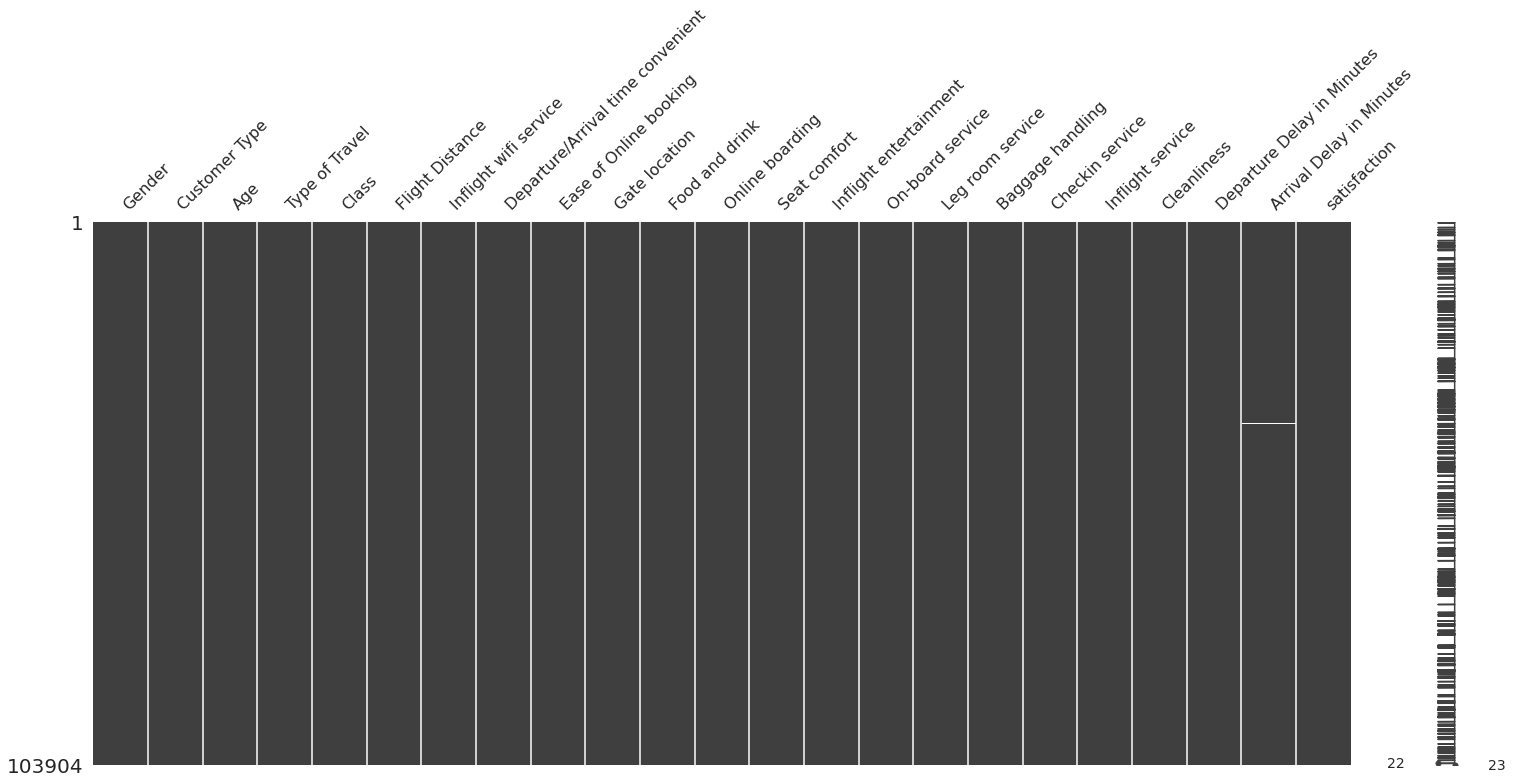

In [227]:
##Visualize missing values (NaN) values using Missingno Library
msno.matrix(train_df);

**Observations**
- There are 103904 rows for 23 features in our data.
- We see in the training data, that all the datatypes belong to a numeric class i.e. int, float and object.
- only arrival dealy in minutes have some null values.

In [228]:
## Percentage of Null values
null_df = train_df.isnull().sum().sort_values(ascending=False).to_frame()
null_df.columns= ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(train_df)*100,2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Arrival Delay in Minutes,310,0.3


In [229]:
round(train_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.38,15.11,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.45,997.15,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.73,1.33,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.06,1.53,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.76,1.40,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.98,1.28,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.20,1.33,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.25,1.35,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.44,1.32,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.36,1.33,0.0,2.0,4.0,4.0,5.0


In [230]:
### Checkin for the duplicate values in the dataset
train_df.duplicated().sum()

0

**Dependent Variable**

The **Satisfaction** is our Target Varible.

In [231]:
train_df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [232]:
round(train_df["satisfaction"].value_counts()[1]/(train_df["satisfaction"].value_counts()[0]+train_df["satisfaction"].value_counts()[1])*100,2)


43.33

This problem is a binary classification problem of classes 0 or 1 denoting customers satisfaction, The class 1 has only 43.33% total values. Hence, this is an balanced learning problem. Hence will not be requiring any resampling techniques to tackle this.

**Independent Variables or Features**

In [233]:
train_df.columns[:-1]

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

# Exploratory Data Analysis and Visualization 

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

In [165]:
train_df.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


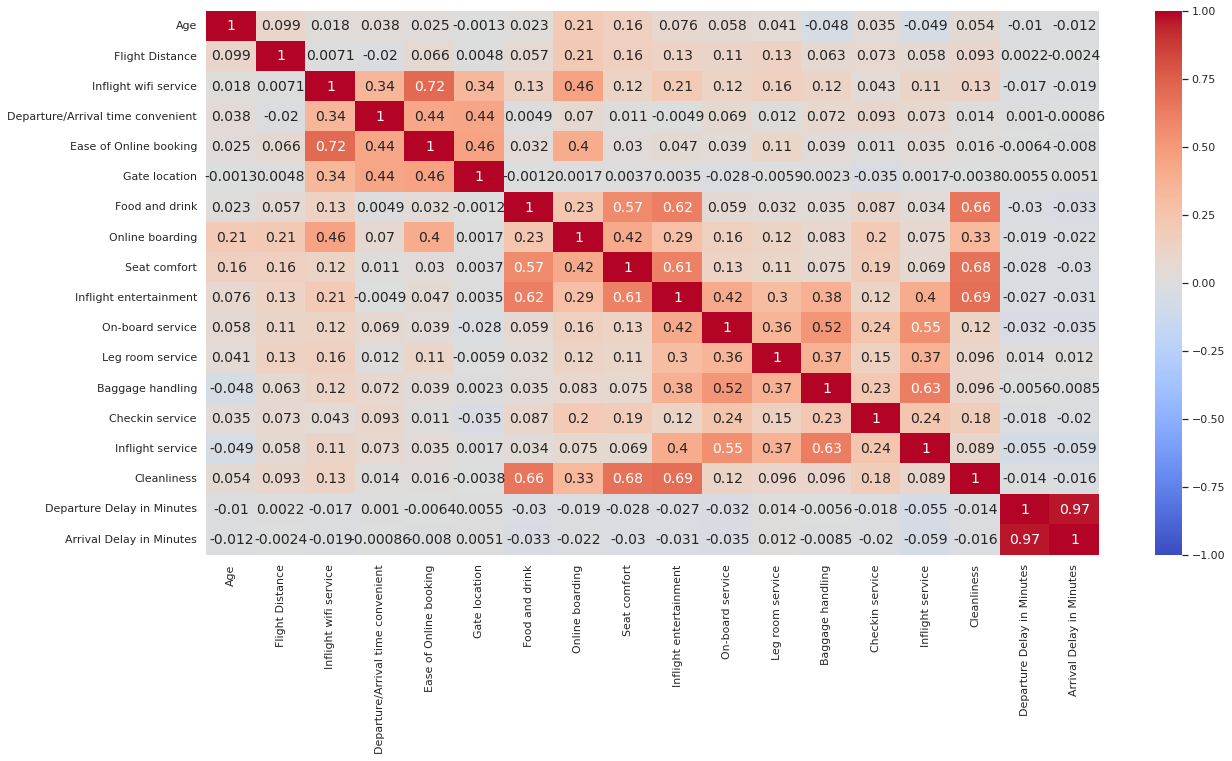

In [166]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

**Observations:**

- Departure delay in minutes and arrival day in minutes are highly co related.

## Data distribution graphs

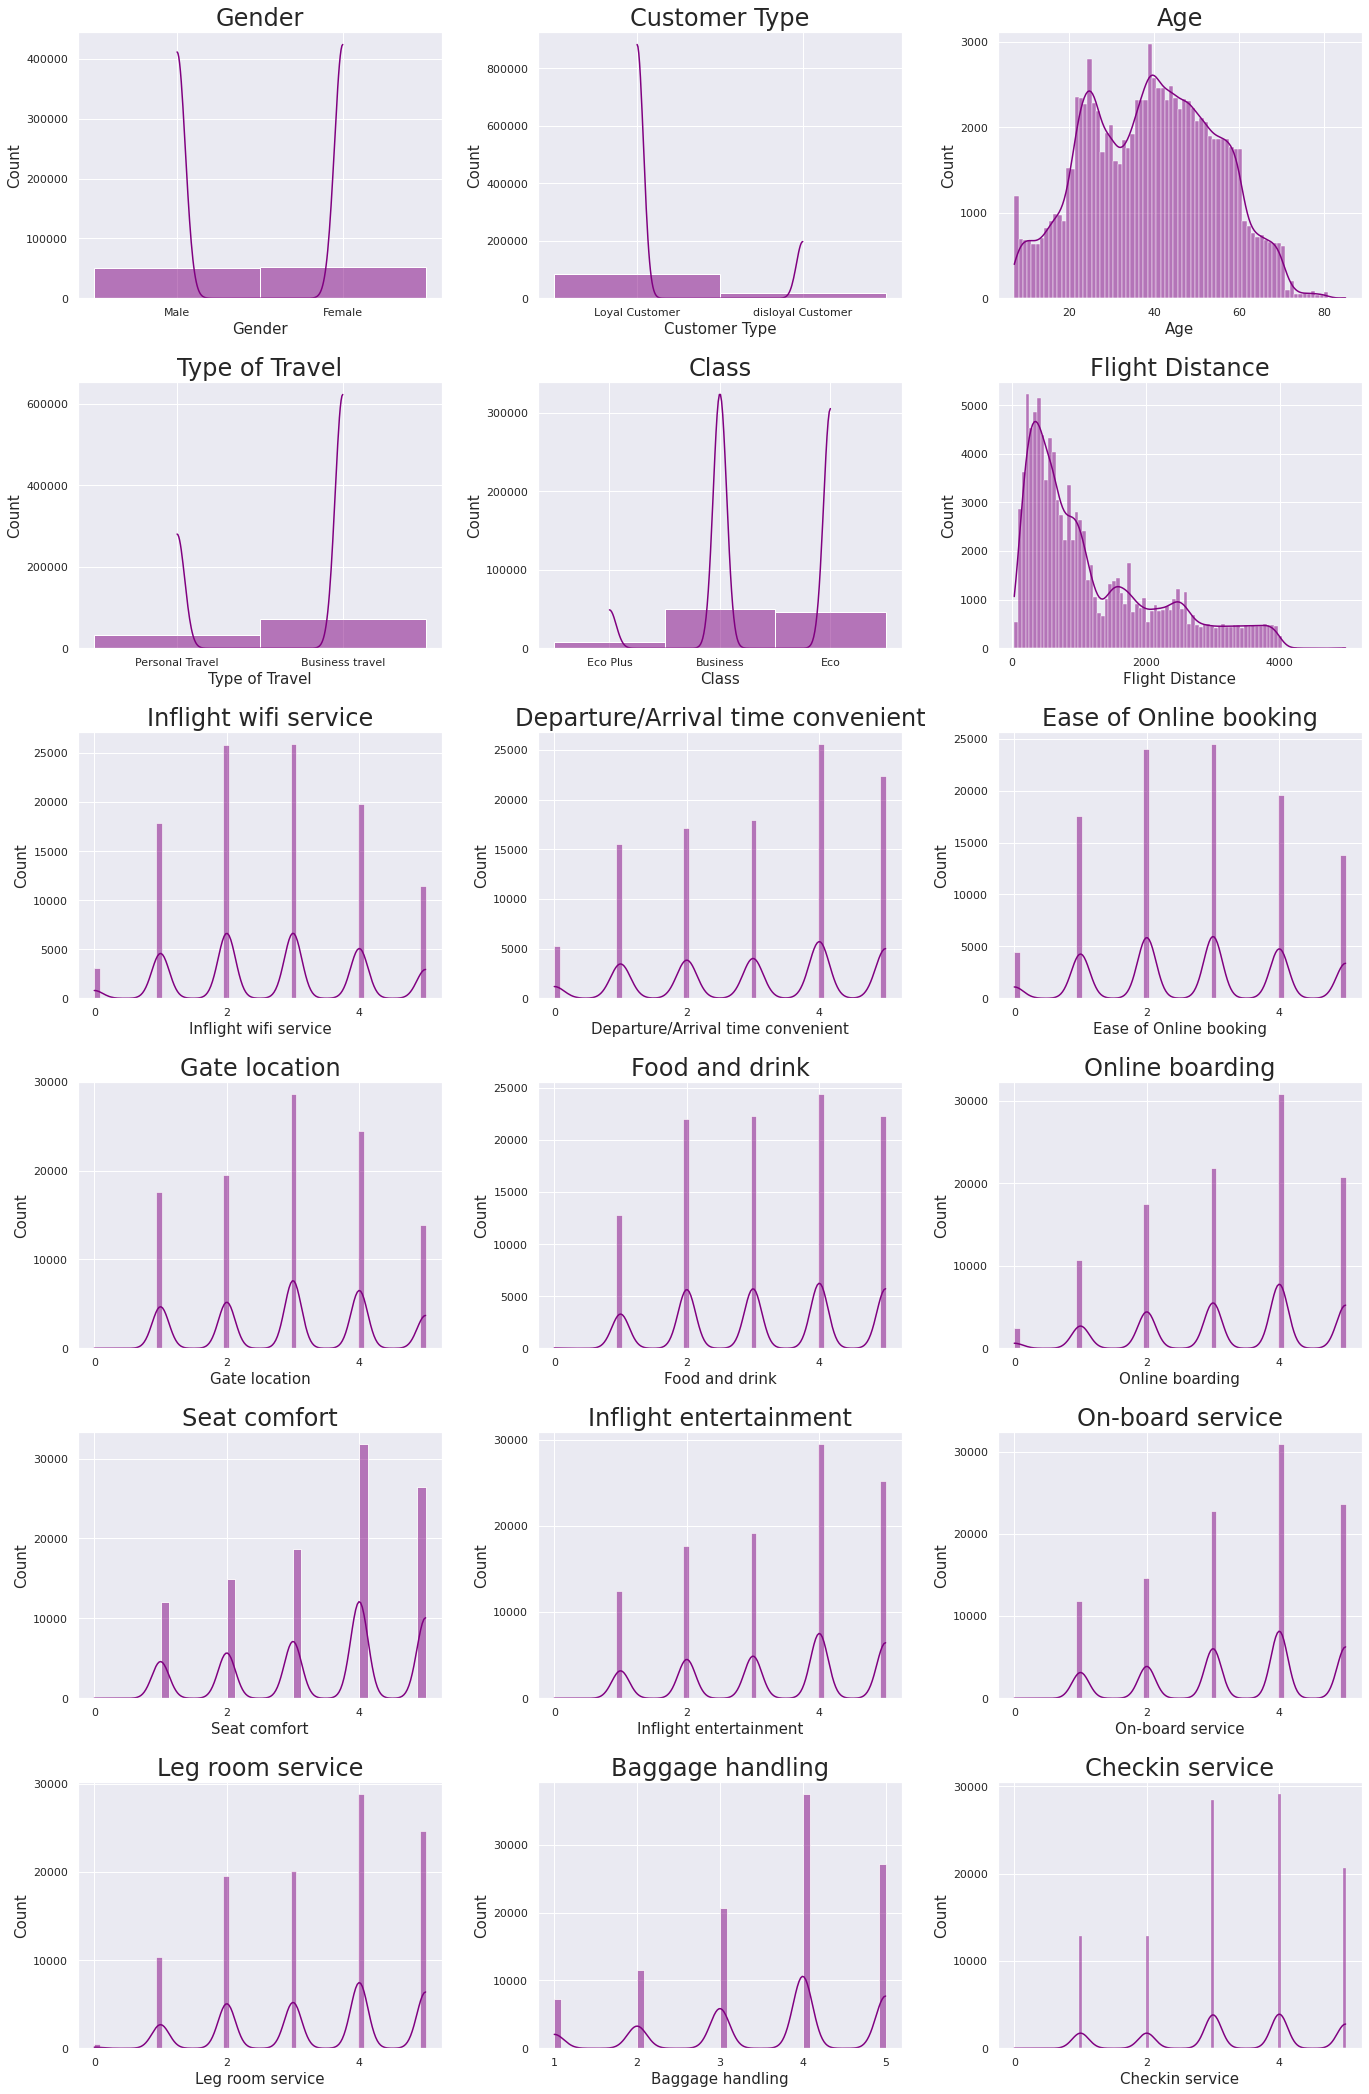

In [167]:
sns.set(rc={
            "font.size":15,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_df,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=train_df,x=train_df[f],kde=True,color='purple')
    ax.set_title(f)

## Piechart percentage distribution features

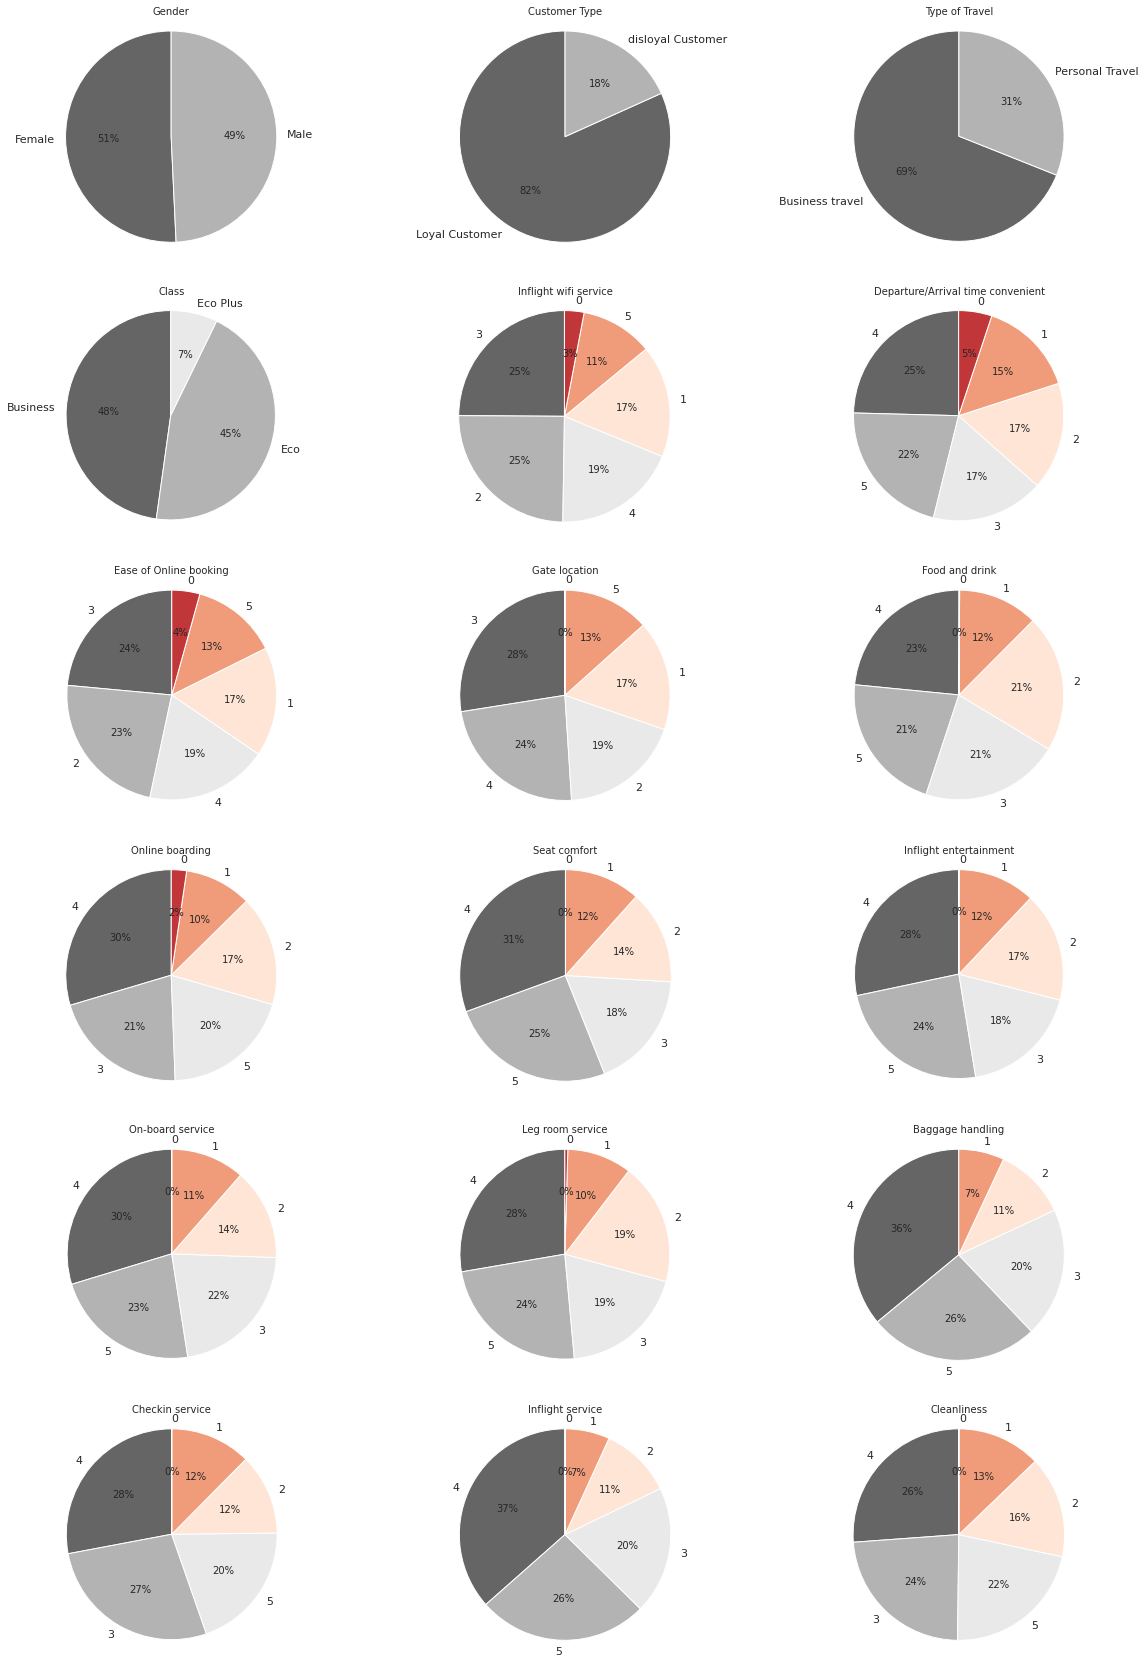

In [48]:
new_train_df=train_df.copy()
new_train_df.drop(['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction'], axis=1, inplace=True)
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(6, 3, figsize = (20, 30))
for i, col in enumerate(new_train_df):
    column_values = new_train_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes,labels = labels, colors = sns.color_palette("RdGy_r"),autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

**Observations:**

- The number of men and women in this sample is approximately the same
- The vast majority of the airline's customers are repeat customers
- Most of our clients flew for business rather than personal reasons
- About half of the passengers were in business class
- More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5)
- More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5)

**Satisfaction**

In [49]:
train_df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

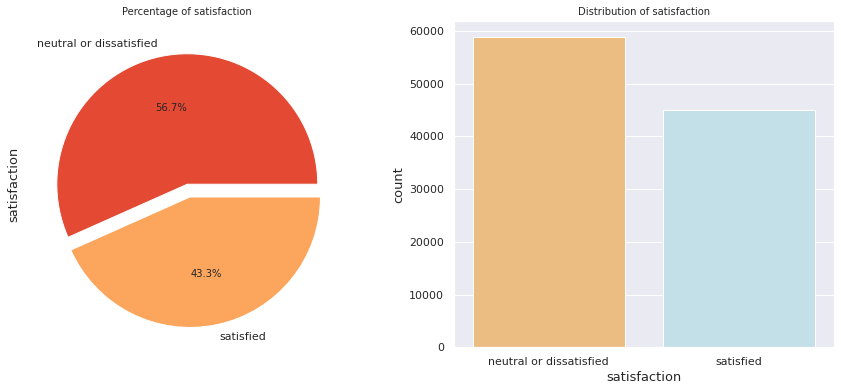

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
train_df['satisfaction'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of satisfaction')
sns.countplot(x='satisfaction',data=train_df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of satisfaction')
plt.show();

**Observations:**
- As per the given data 56.7% people are dissatisfied and neutral
- And 43.3% people are satisfied.

To analyse and visualise the data lets divide data columns into categorical and numerical columns.


In [51]:
# numerical and categoriacl columns(features)
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()


In [52]:
# numerical features
print("Total numeric columns are:", len(numeric_cols))
print(numeric_cols)

Total numeric columns are: 18
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [53]:
# categorical features
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total categorical columns are: 5
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [54]:
categorical_cols.remove("satisfaction")

## ## Exploratory Data Analysis and Visualization on Numerical Columns

### Boxplot: To check the Outliers in the numerical columns.

In [ ]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(6, 3, figsize=(15,30))
fig.tight_layout(pad=3.0)

for f,ax in zip(numeric_cols,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=train_df,y=train_df[f],palette='BuGn')

**Observations:**
- Flight distance, checkin service, Departure Delay in Minutes, Arrival Delay in Minutes has some outlies only

### Barplot representation of numerical feature

In [ ]:
#Plotting the barplot of numerical features
sns.set(rc={'figure.figsize':(8,6),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
for i in numeric_cols:
    sns.barplot(data=train_df,x='satisfaction',y=i,palette='PuRd_r')
    plt.show()


**Observations:**
- From above graphs,it is clear that the age and Gate location, does not play a huge role in flight satisfaction.
- And also the gender does not tell us much as seen in the earlier plot. Hence we can drop these values drop these values

## Exploratory Data Analysis and Visualization on categorical column.

### Barplot represntation on categorica features

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical_cols[:-1]:
    plt.figure(figsize=(8,6)) 
    sns.countplot(data=train_df,x=col,hue ='satisfaction',palette='PuRd_r')
    plt.legend(loc=(1.05,0.5))

**Observations:**
- Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors

- Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers

- Business Travellers seems to be more satisfied with the flight, than the personal travellers

- People in business class seems to be the most satisfied lot, and those in economy class are least satisfied

 ## Arrival Delay in Minutes VS Departure Delay in minutes.

In [ ]:
train_df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

In [ ]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train_df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='magma_r', alpha=0.8)

**Observations:**
- The arrival and departure delay seems to have a linear relationship, which makes complete sense! And well, there is 1 customer who was satisfied even after a delay of 1300 minutes!!

## Flight distance vs Departure Delay in minutes.

In [ ]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train_df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='magma_r', alpha=0.8)
plt.ylim(0,1000)

**Observations:**
- The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in departure, which is a strange finding from this plot!
- So departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays, which also makes sense

## Age and Customer Type

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "gnuplot2_r", data = train_df, ax = ax[0])
sns.histplot(train_df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])


**Observations:**
- From above we can conclude that most of the airline's regular customers are between the ages of 30 and 50 (their average age is slightly over 40). 
- The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30).
 

## Age *vs* Class

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "gnuplot2_r", data = train_df, ax = ax[0])
sns.histplot(train_df, x = "Age", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

**Observations:**
- It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that regular customers mainly buy business class for themselves.

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[0])
sns.histplot(train_df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])


**Observations:**
- customers whose flight distance is long, mostly fly in business class.

## Flight Distance

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[0, 0])
sns.histplot(train_df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[1, 0])
sns.histplot(train_df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])


**Observations:**
- The more distance an aircraft passenger travels (respectively, the longer they are in flight)
- The more they are satisfied with the entertainment in flight and the extra legroom (on average).

# Data Preprocessing and Feature Engineering

In [236]:
train_df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [238]:
# step1: Independent features and dependent features
input_cols = list(train_df.iloc[:,:-1])# independent features
target_col="satisfaction" # dependent feature 

In [241]:
train_val_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)


In [242]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(62342, 23)
(20781, 23)
(20781, 23)


lets take copy of the datasets, so that there will not be further changes in the orignal dataset

In [264]:
# copy of training dataset 
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

# copy of valdation dataset

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

# copy of test dataset

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()


## impute the missing numerical values

In [265]:
# Impute missing numerical values
imputer = SimpleImputer(strategy = 'median').fit(train_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [266]:
#list(imputer.statistics_)

The missing values are now filled in with the mean of each column.

In [267]:
train_inputs[numeric_cols].isna().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

## scaling the numeric features.

In [268]:
# # Scale numeric features
# scaler = PowerTransformer().fit(train_df[numeric_cols])
# train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
# val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
# test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])



In [351]:
# Scale numeric features 
scaler = MinMaxScaler().fit(train_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Note------>>we can use powertransformer method also.

In [270]:
# print('Maximum:')
# list(scaler.data_max_)

We can now verify that values in each column lie in the range 
(
0
,
1
)

In [271]:
train_inputs[numeric_cols].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000,62342.000000
mean,0.414377,0.233852,0.545815,0.611302,0.551355,0.494558,0.640380,0.649014,0.609360,0.671233,0.676597,0.671053,0.658216,0.576838,0.728417,0.655988,0.009334,0.009566
std,0.194144,0.201567,0.265617,0.306021,0.280040,0.319194,0.265363,0.270075,0.329919,0.265791,0.257001,0.262665,0.294975,0.316447,0.234581,0.262329,0.024155,0.024569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077141,0.400000,0.400000,0.400000,0.250000,0.400000,0.400000,0.250000,0.400000,0.400000,0.400000,0.500000,0.500000,0.600000,0.400000,0.000000,0.000000
50%,0.423077,0.163772,0.600000,0.600000,0.600000,0.500000,0.600000,0.600000,0.750000,0.800000,0.800000,0.800000,0.750000,0.500000,0.800000,0.600000,0.000000,0.000000
75%,0.564103,0.344911,0.800000,0.800000,0.800000,0.750000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.750000,1.000000,0.800000,0.007538,0.008207
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## One-hot encode categorical feature

In [272]:
# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [273]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


We can verify that these new columns have been added to our training, test and validation sets.


In [274]:
pd.set_option('display.max_columns', None)

In [275]:
test_inputs

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
80638,Female,Loyal Customer,0.243590,Personal Travel,Eco,0.167609,0.4,0.8,0.4,1.00,1.0,0.4,1.00,1.0,1.0,0.8,0.75,0.50,1.0,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
43398,Male,Loyal Customer,0.192308,Business travel,Business,0.073102,0.6,1.0,1.0,1.00,0.6,0.6,0.50,0.6,0.2,0.2,0.50,0.25,0.6,0.6,0.000000,0.010101,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
32751,Female,Loyal Customer,0.666667,Personal Travel,Eco,0.033320,0.2,0.6,0.2,0.50,0.4,0.6,0.50,0.8,0.8,0.2,0.75,0.50,0.8,0.8,0.023241,0.021465,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
33571,Female,Loyal Customer,0.320513,Personal Travel,Eco,0.199717,0.4,0.6,0.4,0.75,0.8,0.4,0.75,0.8,0.6,0.4,0.75,0.00,0.8,0.8,0.016960,0.002525,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
71287,Male,disloyal Customer,0.358974,Business travel,Business,0.219305,0.4,0.4,0.4,0.00,0.4,0.4,1.00,0.4,0.4,0.4,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,Male,disloyal Customer,0.448718,Business travel,Business,0.041397,0.2,0.2,0.2,0.50,0.2,0.2,0.00,0.2,0.4,0.6,0.75,0.25,0.8,0.2,0.000000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
53718,Male,Loyal Customer,0.089744,Personal Travel,Eco,0.106422,0.4,0.8,0.4,0.25,1.0,0.4,1.00,1.0,0.8,0.8,1.00,1.00,0.8,1.0,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
33319,Male,Loyal Customer,0.025641,Personal Travel,Eco,0.196688,0.4,1.0,0.4,0.50,1.0,0.4,1.00,1.0,0.8,0.8,0.25,0.50,1.0,1.0,0.000628,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
99162,Female,Loyal Customer,0.487179,Business travel,Business,0.646809,0.6,0.6,0.6,0.50,1.0,1.0,1.00,0.8,0.8,0.8,0.75,0.50,0.8,0.6,0.000000,0.011995,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Saving Processed Data to Disk
It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [276]:
# check the shape of the data before saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (62342, 31)
train_targets: (62342,)
val_inputs: (20781, 31)
val_targets: (20781,)
test_inputs: (20781, 31)
test_targets: (20781,)


In [277]:
!pip install pyarrow --quiet

In [278]:
# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')


# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

In [279]:
# check the shape of the data after saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (62342, 31)
train_targets: (62342,)
val_inputs: (20781, 31)
val_targets: (20781,)
test_inputs: (20781, 31)
test_targets: (20781,)


In [295]:
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
val_df['satisfaction'] = val_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

In [296]:
# Select the columns to be used for training/prediction

# training dataset
X_train = train_inputs[numeric_cols + encoded_cols]
y_train = train_df["satisfaction"]

# validation dataset
X_val = val_inputs[numeric_cols + encoded_cols]
y_val=  val_df["satisfaction"]

# test dataset
X_test = test_inputs[numeric_cols + encoded_cols]
y_test= test_df["satisfaction"]


In [297]:
y_train.value_counts()


0    35308
1    27034
Name: satisfaction, dtype: int64

In [298]:
y_val.value_counts()


0    11858
1     8923
Name: satisfaction, dtype: int64

In [299]:
y_test.value_counts()

0    11713
1     9068
Name: satisfaction, dtype: int64

In [300]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/tavishi-1402/airline-passenger-satisfaction-ml-project


'https://jovian.ai/tavishi-1402/airline-passenger-satisfaction-ml-project'

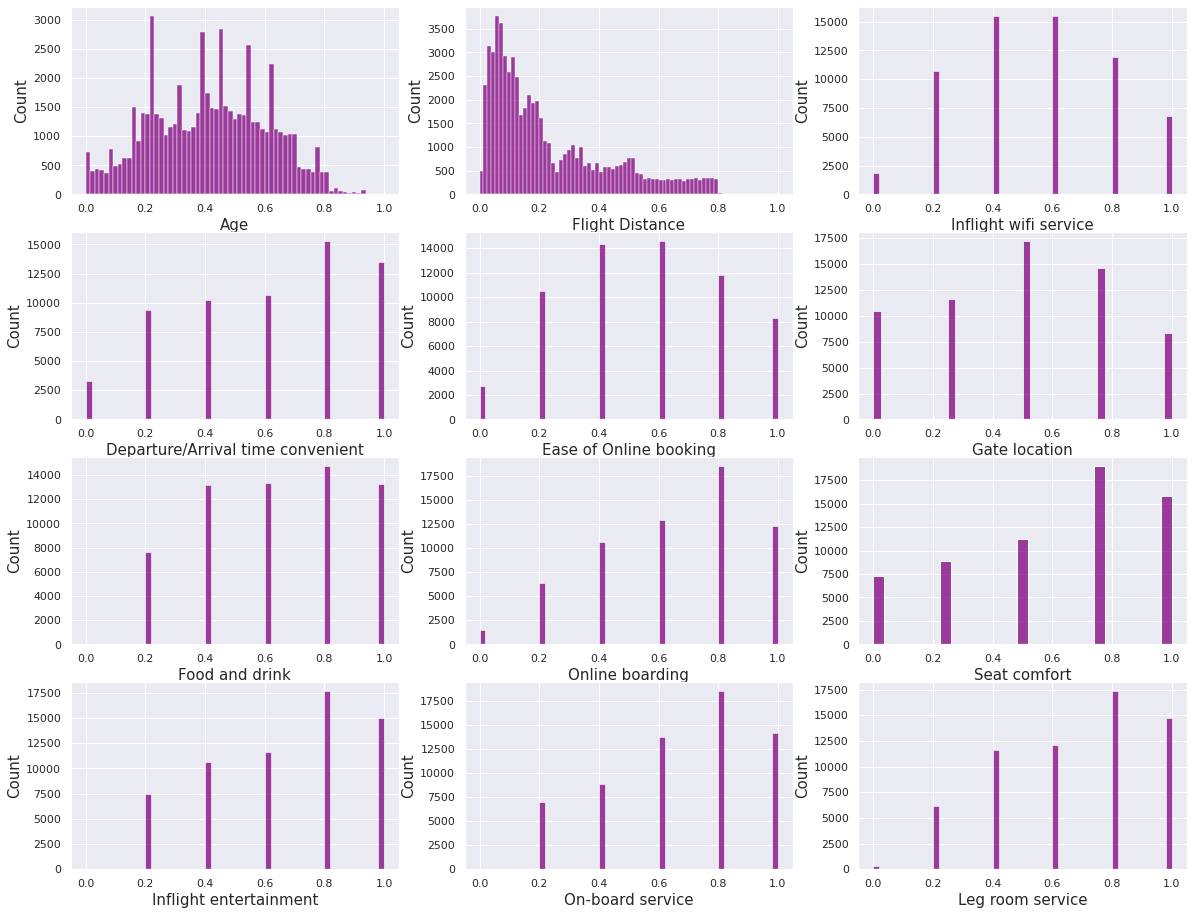

In [286]:
### Distribution after transformation 

columnList = list(X_train.columns)
columnList

fig = plt.figure(figsize=[20,20])
for col,i in zip(columnList,range(1,13)):
    axes = fig.add_subplot(5,3,i)
    sns.histplot(X_train[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show();

# Data Modelling

## Helper function

In [288]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model

    """ 
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [289]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """     
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');

In [352]:
def make_classification_report(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    ### Getting the model name from model object
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]

    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC"]:
      prob_preds = model.decision_function(inputs)
    else:
      prob_preds = model.predict_proba(inputs)[:,1]

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    

    ### Plotting the Confusion Matrix and ROC AUC Curve
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plot_confustion_matrix(targets,preds,axes[0],model_name)
    plot_roc_curve(targets,prob_preds,axes[1])
   

## Non Tree Models

### Logistic Regression

<p>This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.</p> 
<p>In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:<p>

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k 

![](https://media5.datahacker.rs/2021/01/44-1536x707.jpg) 

<p>In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.</p> 
<p>For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit.</p>

[source](https://www.ibm.com/topics/logistic-regression) 


![](https://media5.datahacker.rs/2021/01/83-1536x868.jpg) 


		LOGISTICREGRESSION MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.84      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.57      0.58      0.58     11858
              satisfaction       0.43      0.42      0.43      8923

                  accuracy                           0.51     20781
                 macro avg       0.50      0.50      0.50     20781
              weighted avg       0.51      0.51      0.51     20781

Accuracy score for traing dataset 0.8744024894934395
Accuracy score for validation dataset 0.5129204561859391
ROC AUC 

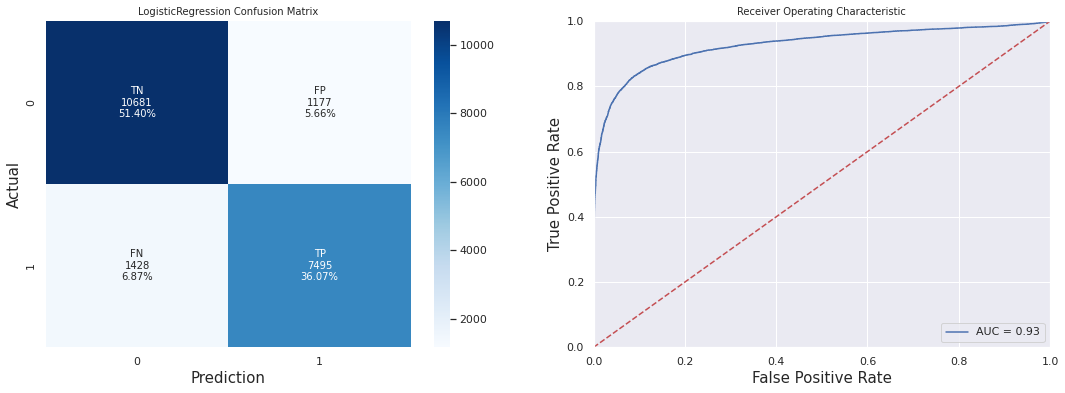

In [301]:
# import the model
from sklearn.linear_model import LogisticRegression

#fit the model
model =LogisticRegression()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_test)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations**
- The auc roc score is 92.68 %
- But this model is not working good with validation data. And also not predecting the True Positives.

### **Gaussian Naive Bayes**

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.
<p><strong>Note</strong>: The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.</p> 

<center><p><strong>Bayes’ Theorem</strong></p></center>

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7777aa719ea14857115695676adc0914_l3.svg" alt="Naive Bayes Equations" width="200" height="50"></center> 

where A and B are events and P(B) ≠ 0.

Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
- P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
- P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.  

Now, with regards to our dataset, we can apply Bayes’ theorem in following way:

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-e85875a7ff9e9b557eab6281cc7ff078_l3.svg" alt="Naive Bayes Equations" width="200" height="50"></center>  

where, y is class variable and X is a dependent feature vector (of size n)  
<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-5385a4693c3fb17811cf36593978a601_l3.svg" alt="Naive Bayes Equations" width="200" height="50"></center> 

After substituting and solving the above equation we get the below 

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-c778553cb5a67518205ac6ea18502398_l3.svg" alt="Naive Bayes Equations" width="300" height="45"></center> 

Now, To create a classifier model. we need to find the probability of given set of inputs for all possible values of the class variable y and pick up the output with maximum probability. This can be expressed mathematically as:  

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-f3637f468262bfbb4accb97da8110028_l3.svg" alt="Naive Bayes Equations" width="300" height="45"></center> 

So, finally, we are left with the task of calculating P(y) and P(xi | y).

Please note that P(y) is also called class probability and P(xi | y) is called conditional probability.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of P(xi | y). 

<center><p><strong>Gaussian Naive Bayes classifier</strong></p></center> 

In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values as shown below: 
<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/naive-bayes-classification-1.png" alt="Naive Bayes Equations" width="300" height="200"></center>  

The likelihood of the features is assumed to be <a href="https://en.wikipedia.org/wiki/Gaussian_function">Gaussian</a>, hence, conditional probability is given by:  

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7fb78d7323fcbade0cb664161a8e84c4_l3.svg" alt="Naive Bayes Equations" width="300" height="45"></center>

		GAUSSIANNB MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.87     35308
              satisfaction       0.83      0.82      0.82     27034

                  accuracy                           0.85     62342
                 macro avg       0.84      0.84      0.84     62342
              weighted avg       0.85      0.85      0.85     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.87      0.87     11858
              satisfaction       0.82      0.82      0.82      8923

                  accuracy                           0.85     20781
                 macro avg       0.84      0.84      0.84     20781
              weighted avg       0.85      0.85      0.85     20781

Accuracy score for traing dataset 0.8472458374771422
Accuracy score for validation dataset 0.8476492950291131
ROC AUC Score : 

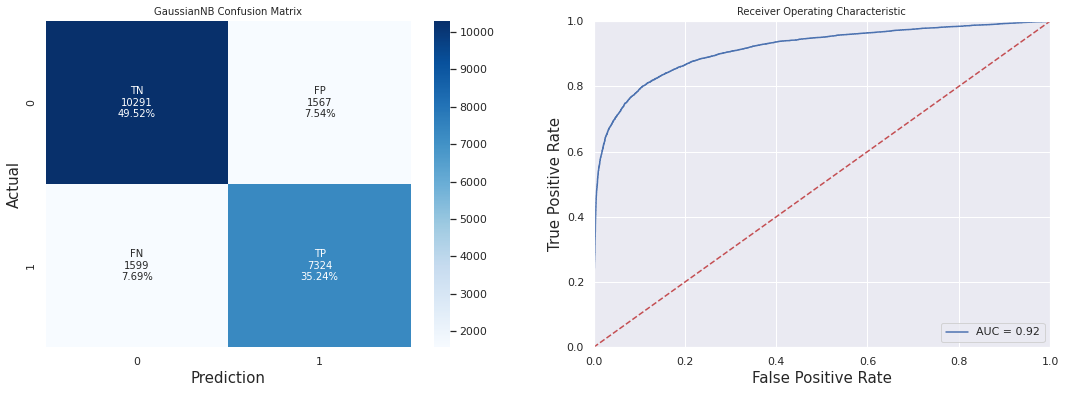

In [302]:
# import the model
from sklearn.naive_bayes import GaussianNB

#fit the model
model =GaussianNB()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations**

- The ROC AUC score is 91.58%. But the Recall and F1 scores are low. Thus we can say our model is failing to predict the True Positives
- The Recall and F1 Score of the GaussianNB is more less than Logistic Regresssion.
- This model working better with validation data.

### SVM(Support Vector Machines)

Support Vector Machine, or SVM, is one of the most popular supervised learning algorithms, and it can be used both for classification as well as regression problems. However, in machine learning, it is primarily used for classification problems. 

- In the SVM algorithm, each data item is plotted as a point in n-dimensional space, where n is the number of features we have at hand, and the value of each feature is the value of a particular coordinate.

- The goal of the SVM algorithm is to create the best line, or decision boundary, that can segregate the n-dimensional space into distinct classes, so that we can easily put any new data point in the correct category, in the future. This best decision boundary is called a hyperplane. 
- The best separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class. Indeed, there are many hyperplanes that might classify the data. Aas reasonable choice for the best hyperplane is the one that represents the largest separation, or margin, between the two classes.

The SVM algorithm chooses the extreme points that help in creating the hyperplane. These extreme cases are called support vectors, while the SVM classifier is the frontier, or hyperplane, that best segregates the distinct classes.

The diagram below shows two distinct classes, denoted respectively with blue and green points. 

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/svm.png)  

Support Vector Machine can be of two types:

- Linear SVM: A linear SVM is used for linearly separable data, which is the case of a dataset that can be classified into two distinct classes by using a single straight line.
- Non-linear SVM: A non-linear SVM is used for non-linearly separated data, which means that a dataset cannot be classified by using a straight line. 


<center><table>
<tr><td><center><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/svm_linear.png" alt="LinearSVC " width="300" height="300"></center>
</td>
<td><center><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/svm_nonlinear_1.png" alt="LinearSVC " width="300" height="300"></center>
</td></tr>
<tr><td><center>LinearSVM</center></td> 
<td><center>Non-linear SVM</center></td> </tr>
</table></center> 

We need to choose the best Kernel according to our need.

- The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
- Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- Polynomial kernels give good results for problems where all the training data is normalized. 

		LINEARSVC MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.83      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     11858
              satisfaction       0.86      0.84      0.85      8923

                  accuracy                           0.87     20781
                 macro avg       0.87      0.87      0.87     20781
              weighted avg       0.87      0.87      0.87     20781

Accuracy score for traing dataset 0.8731032049019922
Accuracy score for validation dataset 0.8741157788364371
ROC AUC Score : 9

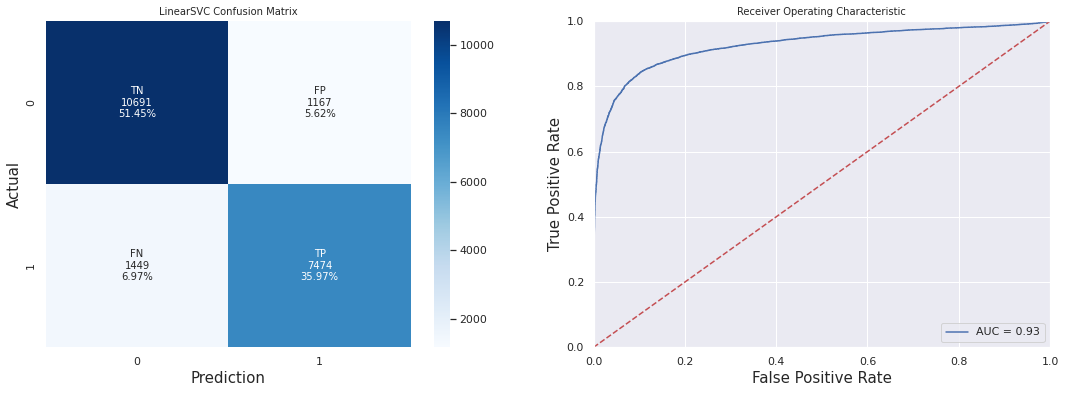

In [303]:
# import the model
from sklearn.svm import LinearSVC

#fit the model
model =LinearSVC()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)


**Observations**

- The ROC AUC score is 92.62%. 
- But the Recall and F1 scores are low. Thus we can say our model is failing to predict the True Positives

### K-Nearest Neighbours

<p>K-nearest neighbors is a supervised machine learning algorithm for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-nearest neighbors are used for classification or regression.</p>  
<p>The main idea behind K-NN is to find the K nearest data points, or neighbors, to a given data point and then predict the label or value of the given data point based on the labels or values of its K nearest neighbors.</p>
<p>K can be any positive integer, but in practice, K is often small, such as 3 or 5. The “K” in K-nearest neighbors refers to the number of items that the algorithm uses to make its prediction whether its a classification problem or a regression problem.</p>
<center><img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/1327962.png" alt="KNN " width="500" height="600"></center>

Once K and distance metric are selected, K-NN algorithm goes through the following steps:
- Calculate distance: The K-NN algorithm calculates the distance between a new data point and all training data points. This is done using the selected distance metric.
- Find nearest neighbors: Once distances are calculated, K-nearest neighbors are determined based on a set value of K.
- Predict target class label: After finding out K nearest neighbors, we can then predict the target class label for a new data point by taking majority vote from its K neighbors (in case of classification) or by taking average from its K neighbors (in case of regression).

Below are the differnt distance functions to calculate the nearest neighbours

![](https://www.saedsayad.com/images/KNN_similarity.png) 


		KNEIGHBORSCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.98      0.95     35308
              satisfaction       0.97      0.90      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.95      0.94      0.94     62342
              weighted avg       0.95      0.94      0.94     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.96      0.94     11858
              satisfaction       0.95      0.87      0.91      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.92      0.92     20781
              weighted avg       0.93      0.93      0.92     20781

Accuracy score for traing dataset 0.9447884251387507
Accuracy score for validation dataset 0.9251720321447476
ROC AU

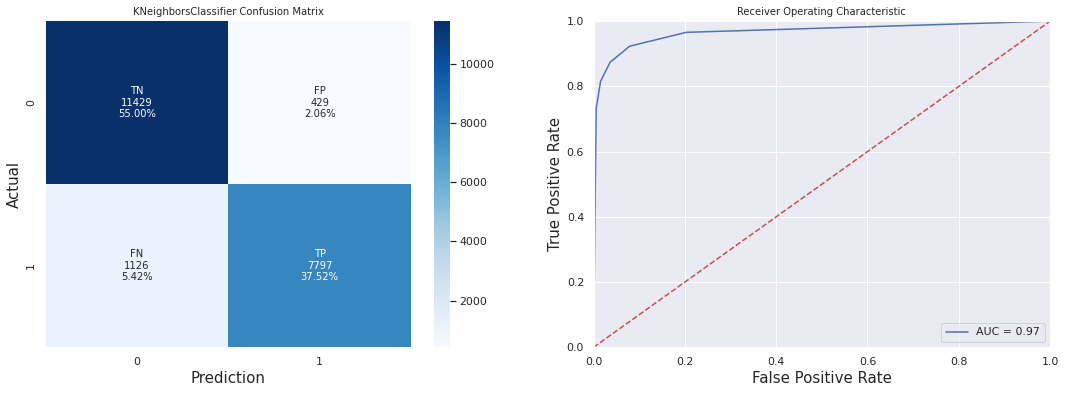

In [304]:
# import the model
from sklearn.neighbors import KNeighborsClassifier

#fit the model
model =KNeighborsClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- The ROC AUC score is 96.60%.
- The Recall and F1 scores are good.
- But model is failing to predict the True Positives.

### SGDClassifier

<center><strong><h5>Gradient Descent</strong></center>


Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. 
- The general idea is to tweak parameters iteratively in order to minimize the cost function.
- An important parameter of Gradient Descent (GD) is the size of the steps, determined by the learning rate hyperparameters. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time, and if it is too high we may jump the optimal value.

<strong>Note</strong>: When using Gradient Descent, we should ensure that all features have a similar scale (e.g. using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.
 

Types of Gradient Descent: Thereare three types of Gradient Descent:  

- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent

<strong>Stochastic Gradient Descent</strong> 
- The word 'stochastic' means a system or process linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. 

- If the sample size is very large, it becomes computationally very expensive to find the golbal minima over the entire dataset. With SGD a random sample is selected to perform each iteration. This sample is randomly shuffled and selected for performing the iteration. 

![](https://images.deepai.org/glossary-terms/dd6cdd6fcfea4af1a1075aac0b5aa110/sgd.png) 

In SGDClassifier from scikit learn implements regularized linear models with stochastic gradient descent (SGD) learning. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).The various loss function supported are

- 'hinge' gives a linear SVM.

- 'log_loss’ gives logistic regression, a probabilistic classifier.

- 'modified_huber' is another smooth loss that brings tolerance to
outliers as well as probability estimates.

- 'squared_hinge' is like hinge but is quadratically penalized.

- 'perceptron' is the linear loss used by the perceptron algorithm.



		SGDCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.77      0.83     35308
              satisfaction       0.75      0.90      0.82     27034

                  accuracy                           0.83     62342
                 macro avg       0.83      0.84      0.83     62342
              weighted avg       0.84      0.83      0.83     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.92      0.77      0.83     11858
              satisfaction       0.74      0.91      0.82      8923

                  accuracy                           0.83     20781
                 macro avg       0.83      0.84      0.83     20781
              weighted avg       0.84      0.83      0.83     20781

Accuracy score for traing dataset 0.8271149465849668
Accuracy score for validation dataset 0.8263798662239545
ROC AUC Score

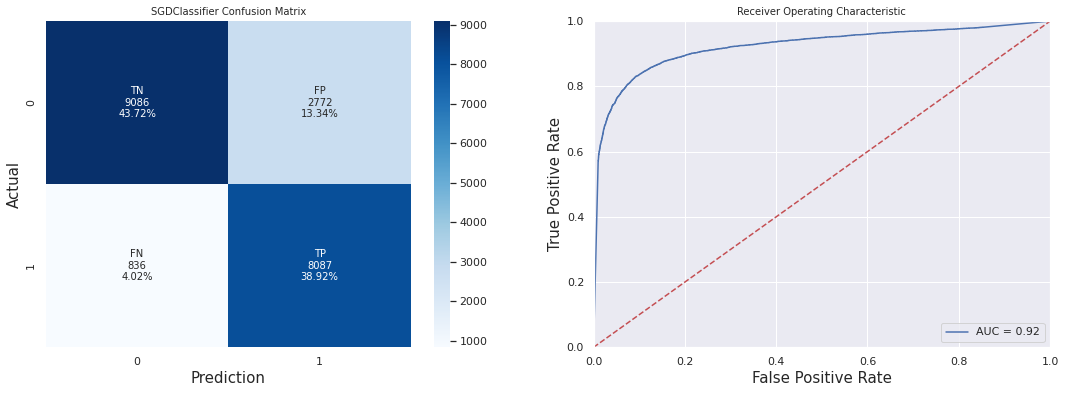

In [305]:
# import the model
from sklearn.linear_model import SGDClassifier

#fit the model
model =SGDClassifier(loss='modified_huber',n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- The ROC AUC score is 92.26%. But the Recall and F1 scores are low.

## **Tree Based models**

- The tree based model are robust to outliers, as our has many outliers we will check how this models perform on our data

### **Decision Tree Classifier**

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. A decision tree starts at a single point (or ‘node’) which then branches (or ‘splits’) in two or more directions. Each branch offers different possible outcomes, incorporating a variety of decisions and chance events until a final outcome is achieved. 

<center>
<img src="https://i.imgur.com/4RX9be3.png" width="600" height="400">
</center> 


While there are multiple ways to select the best attribute at each node, two methods, information gain and Gini impurity, act as popular splitting criterion for decision tree models. They help to evaluate the quality of each test condition and how well it will be able to classify samples into a class.  

**Entropy and Information Gain** 

- Entropy is a concept that stems from information theory, which measures the impurity of the sample values. It is defined with by the following formula, where: 

<center>
<img src="https://www.humaneer.org/static/7968dcf20ae9fa961be59cd8bbdf5a24/0d1a4/6003fba5-03fe-45f4-9cb2-acb0231c29e8.png" width="200" height="60">
</center> 
<center>
<table>
<tr><td>S - Set of all instances</td></tr>
<tr><td>N - Number of distinct class values</td></tr>
<tr><td>Pi - Event probablity</td></tr>
<table>
</center> 

- Information gain indicates how much information a particular variable or feature gives us about the final outcome. It can be found out by subtracting the entropy of a particular attribute inside the data set from the entropy of the whole data set.

<center>
<img src="https://www.humaneer.org/static/572ca05e5658d32bc53009f2cd766711/f1c64/cf354c51-a73a-4202-a56f-8b1a82e7136e.png" width="400" height="60">
</center> 

<center>
<table>
<tr><td>H(S) - entropy of whole data set S</td></tr>
<tr><td>|Sj| - number of instances with j value of an attribute A</td></tr>
<tr><td>|S| - total number of instances in the dataset</td></tr>
<tr><td>v - set of distinct values of an attribute A</td></tr>
<tr><td>H(Sj) - entropy of subset of instances for attribute A</td></tr>
<tr><td>H(A, S) - entropy of an attribute A</td></tr>
<table>
</center> 







**Gini Impurity** 

Gini impurity is the probability of incorrectly classifying random data point in the dataset if it were labeled based on the class distribution of the dataset. Similar to entropy, if set, S, is pure—i.e. belonging to one class) then, its impurity is zero. This is denoted by the following formula:  

<center>
<img src="https://static.wixstatic.com/media/02b811_5df05513ffd4487d843bb401dfa5e0cb~mv2.png/v1/fit/w_309%2Ch_118%2Cal_c/file.png" width="200" height="60">
</center> 

<p>The Complex decision trees tend to overfit and do not generalize well to new data. This scenario can be avoided through the processes of pre-pruning or post-pruning. </p>
<p>Small variations within data can produce a very different decision tree. Bagging, or the averaging of estimates, can be a method of reducing variance of decision trees</p>

		DECISIONTREECLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.95      0.95     11858
              satisfaction       0.94      0.94      0.94      8923

                  accuracy                           0.95     20781
                 macro avg       0.95      0.95      0.95     20781
              weighted avg       0.95      0.95      0.95     20781

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9476926038207979
ROC AUC Score : 94.

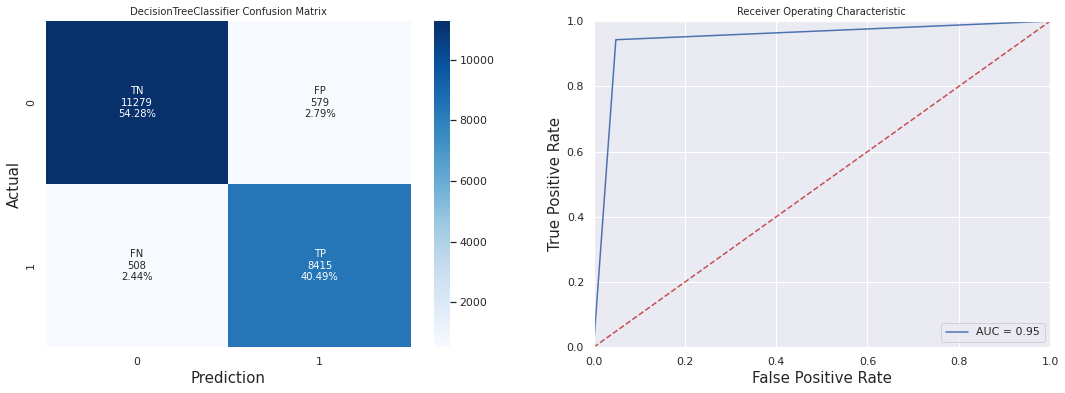

In [306]:
# import the model
from sklearn.tree import DecisionTreeClassifier

#fit the model
model =DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- The ROC AUC score is 94.71%.
- The Recall and F1 scores are good.
- But model will cause overfitting. as the accuracy score for training dataset is 1.

### **Random Forest Classifier**

Random Forest Classifier is Ensemble algorithm. Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.  

This works well because a single decision tree may be prone to a noise, but aggregate of many decision trees reduce the effect of noise giving more accurate results. 

![](https://1.cms.s81c.com/sites/default/files/2020-12-07/Random%20Forest%20Diagram.jpg) 


Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems. 
- The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. 
- Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample. 
- Another instance of randomness is then injected through feature bagging, adding more diversity to the dataset and reducing the correlation among decision trees. 
- Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a majority vote—i.e. the most frequent categorical variable—will yield the predicted class. 
- Finally, the oob sample is then used for cross-validation, finalizing that prediction.

		RANDOMFORESTCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9620807468360522
ROC AUC Score : 99.

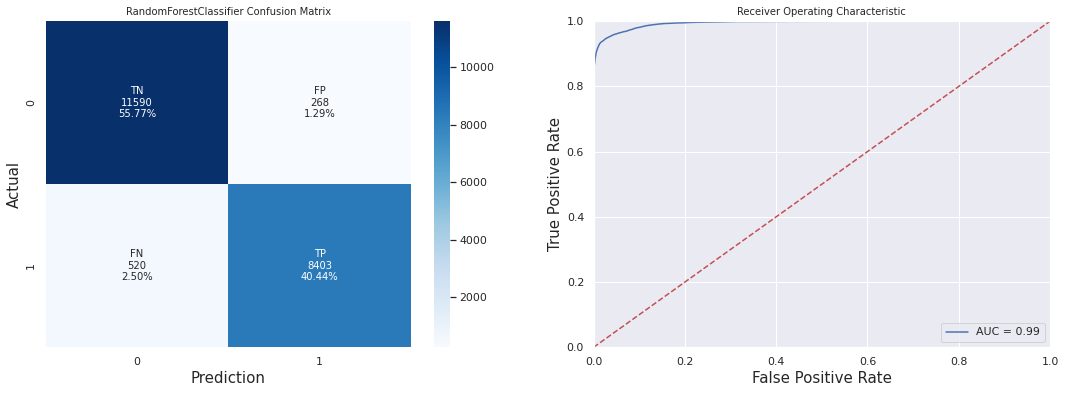

In [307]:
#import the model

from sklearn.ensemble import RandomForestClassifier

#fit the model
model =RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- The ROC AUC score is 99.37%.
- The Recall and F1 scores are good.
- But model can cause overfitting, as the accuracy score for training dataset is 1, 
- But after hypertunning we can train this model model is working much better with the validation dataset set as compared to other trained model.

### **Adaboost Classifier**

AdaBoost is an ensemble learning method (also known as “meta-learning”) which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.

Rather than being a model in itself, AdaBoost can be applied on top of any classifier to learn from its shortcomings and propose a more accurate model. It is usually called the “best out-of-the-box classifier” for this reason.

Stumps have one node and two leaves. AdaBoost uses a forest of such stumps rather than trees.

**Adaboost works in the following steps:** 

- Initially, Adaboost selects a training subset randomly.
It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.

- Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.

- This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
To classify, perform a "vote" across all of the learning algorithms you built.

**Pros of Aaboost**

AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

Cons of Aaboost
AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.


		ADABOOSTCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     35308
              satisfaction       0.92      0.91      0.92     27034

                  accuracy                           0.93     62342
                 macro avg       0.93      0.93      0.93     62342
              weighted avg       0.93      0.93      0.93     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.94      0.94     11858
              satisfaction       0.92      0.91      0.92      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.93      0.93     20781
              weighted avg       0.93      0.93      0.93     20781

Accuracy score for traing dataset 0.9286997529755221
Accuracy score for validation dataset 0.9283961310812762
ROC AUC 

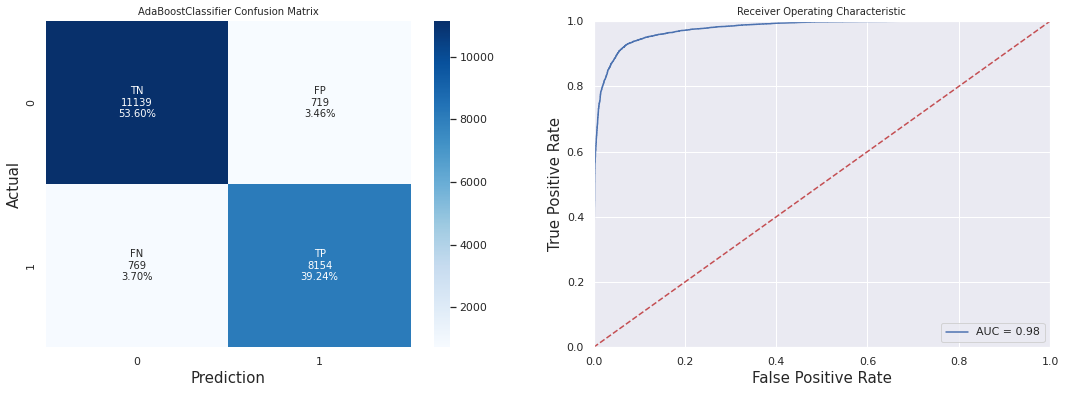

In [308]:
#import the model

from sklearn.ensemble import AdaBoostClassifier
#fit the model
model =AdaBoostClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)
                        

**Observations:**
- The ROC AUC score is 97.74%.
- The Recall and F1 scores are good but comapritively lower than the random forest.


### Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets.

Gradient boosting algorithm is one of the most powerful algorithms in the field of machine learning. As we know that the errors in machine learning algorithms are broadly classified into two categories i.e. Bias Error and Variance Error. As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.

**Gradient Boosting has three main components:**

1.**Loss Function -** The role of the loss function is to estimate how good the model is at making predictions with the given data. This could vary depending on the problem at hand. For example, if we're trying to predict the weight of a person depending on some input variables (a regression problem), then the loss function would be something that helps us find the difference between the predicted weights and the observed weights. On the other hand, if we're trying to categorize if a person will like a certain movie based on their personality, we'll require a loss function that helps us understand how accurate our model is at classifying people who did or didn't like certain movies.

2.**Weak Learner -** A weak learner is one that classifies our data but does so poorly, perhaps no better than random guessing. In other words, it has a high error rate. These are typically decision trees (also called decision stumps, because they are less complicated than typical decision trees).

3.**Additive Model -** This is the iterative and sequential approach of adding the trees (weak learners) one step at a time. After each iteration, we need to be closer to our final model. In other words, each iteration should reduce the value of our loss function.

		GRADIENTBOOSTINGCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     44202
              satisfaction       0.95      0.92      0.93     33726

                  accuracy                           0.94     77928
                 macro avg       0.94      0.94      0.94     77928
              weighted avg       0.94      0.94      0.94     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     14677
              satisfaction       0.95      0.92      0.93     11299

                  accuracy                           0.94     25976
                 macro avg       0.94      0.94      0.94     25976
              weighted avg       0.94      0.94      0.94     25976

Accuracy score for traing dataset 0.9426265270506108
Accuracy score for validation dataset 0.9421388974437943


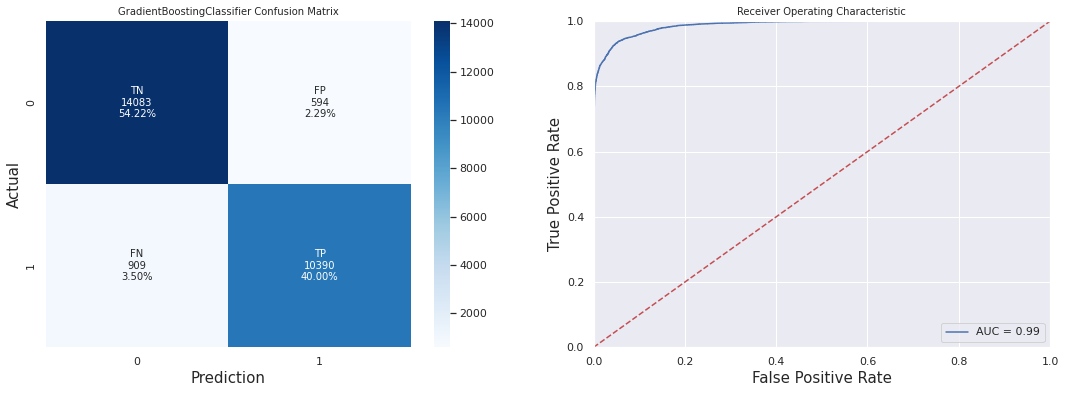

In [183]:
#import the model

from sklearn.ensemble import GradientBoostingClassifier

#fit the model
model =GradientBoostingClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- The ROC AUC score is 98.74%.
- The Recall and F1 scores are good.
- We can choose this datadset to train our model.

### Gradient Boosting Machines(XGBoost)

XgBoost stands for Extreme Gradient Boosting.It implements machine learning algorithms under the Gradient Boosting framework. 

- In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. 
- Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. 
- The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model.
- It can work on regression, classification, ranking, and user-defined prediction problems. 

![](https://miro.medium.com/max/809/1*ozf-ftCx-jy2jII4cEv9YA.png)

		XGBCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     35308
              satisfaction       0.95      0.92      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.94      0.94      0.94     62342
              weighted avg       0.94      0.94      0.94     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     11858
              satisfaction       0.94      0.92      0.93      8923

                  accuracy                           0.94     20781
                 macro avg       0.94      0.94      0.94     20781
              weighted avg       0.94      0.94      0.94     20781

Accuracy score for traing dataset 0.9418048827435758
Accuracy score for validation dataset 0.9407150762715942
ROC AUC Score

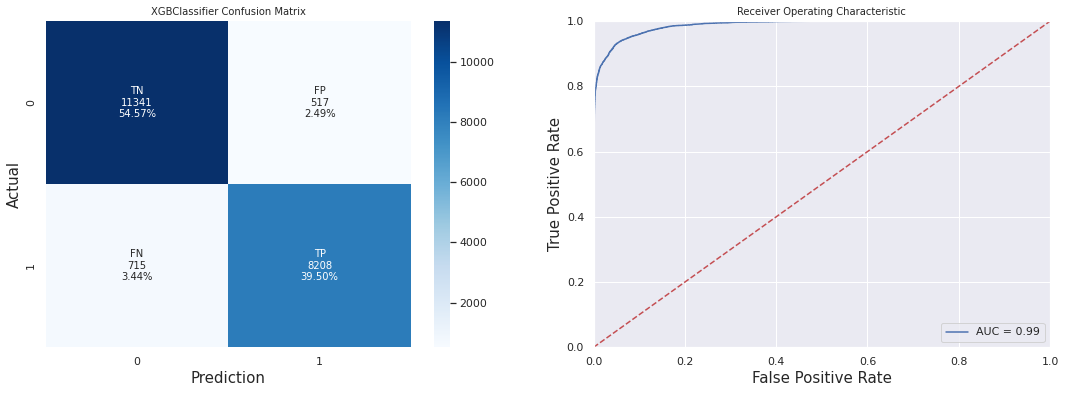

In [309]:
#import the model

from xgboost import XGBClassifier

#fit the model
model =XGBClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 98.72%.slightly higher than gradient Boosting.
- The Recall and F1 scores are good.
- We can choose this datadset to train our model. Ans can also improve our model with Hyperparameter tunning.

### LightBoost

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data. 

LightGBM uses histogram-based algorithms, which bucket continuous feature (attribute) values into discrete bins. This speeds up training and reduces memory usage. 

LightGBM grows trees leaf-wise (best-first). It will choose the leaf with max delta loss to grow. Holding #leaf fixed, leaf-wise algorithms tend to achieve lower loss than level-wise algorithms.
![](https://lightgbm.readthedocs.io/en/latest/_images/leaf-wise.png)

Leaf-wise may cause over-fitting when #data is small, so LightGBM includes the max_depth parameter to limit tree depth. However, trees still grow leaf-wise even when max_depth is specified. 

		LGBMCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     35308
              satisfaction       0.98      0.94      0.96     27034

                  accuracy                           0.97     62342
                 macro avg       0.97      0.96      0.97     62342
              weighted avg       0.97      0.97      0.97     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 0.9670045875974463
Accuracy score for validation dataset 0.9632837688272942
ROC AUC Scor

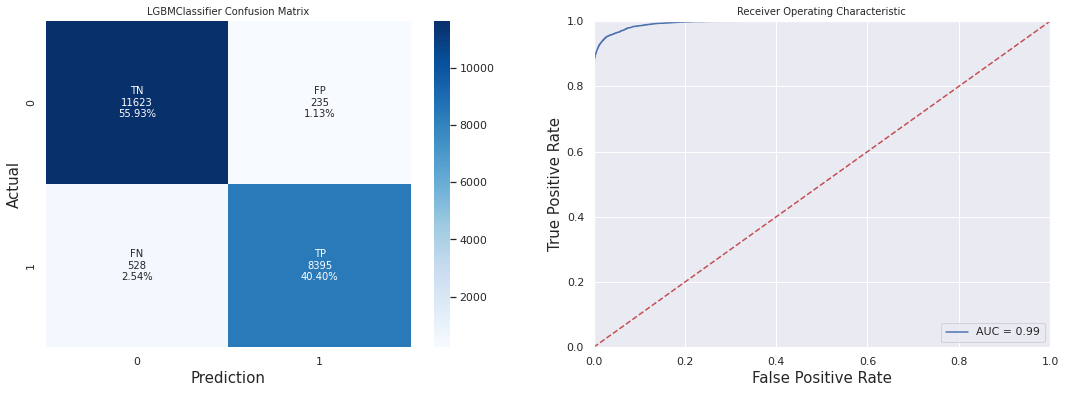

In [310]:
#import the model

import lightgbm as lgb

#fit the model
model =lgb.LGBMClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)


**Observations:**
- this model is performing best with our Dataset.
- The ROC AUC score is 99.49%.
- The Recall and F1 scores are Very good.
- We can choose this datadset to train our model.

## **Hyperparameter Tuning**

### The Hyperparameter Tuning of LightGBM

The Hyperparamer Tuning suggestions from LightGBM

For Better Accuracy
- Use large max_bin (may be slower)
- Use small learning_rate with large num_iterations
- Use large num_leaves (may cause over-fitting)
- Use bigger training data
- Try dart

Deal with Over-fitting 
- Use small max_bin
- Use small num_leaves
- Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
- Try max_depth to avoid growing deep tree
- Try extra_trees
- Try increasing path_smooth

In [ ]:
lgb_model=lgb.LGBMClassifier()

In [ ]:
lgb_model.get_params()


In [ ]:
lgbm_rscv_params = {'boosting_type': ["dart","gbdt"],
          'min_data_in_leaf' : [550,600,650],
          'min_split_gain': [0.2,0.225,0.25],
          'min_child_weight':[3,4,5],
          'learning_rate' : [0.055,0.06,0.065],
          'max_depth': [4,5,6,7],
          'colsample_bytree': [0.2,0.25,0.3],
          'n_estimators': [100,200,500,750],
 }
lgbm_model = lgb.LGBMClassifier(random_state=42,n_jobs=-1)

In [ ]:
lgbm_rscv_model = RandomizedSearchCV(estimator = lgbm_model,
                                      param_distributions=lgbm_rscv_params,
                                      n_iter=50,
                                      cv=3,
                                      scoring= 'roc_auc',
                                      verbose=2)

In [ ]:
initial_params = {
    "random_state":42,
    "n_jobs":-1
}

In [113]:
# %%time
lgbm_rscv_model.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.065, max_depth=4, min_child_weight=4, min_data_in_leaf=600, min_split_gain=0.225, n_estimators=500; total time=  36.1s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.065, max_depth=4, min_child_weight=4, min_data_in_leaf=600, min_split_gain=0.225, n_estimators=500; total time=  37.6s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.065, max_depth=4, min_child_weight=4, min_data_in_leaf=600, min_split_gain=0.225, n_estimators=500; total time=  37.8s
[CV] END boosting_type=gbdt, colsample_bytree=0.2, learning_rate=0.065, max_depth=6, min_child_weight=4, min_data_in_leaf=650, min_split_gain=0.225, n_estimators=200; total time=   1.7s
[CV] END boosting_type=gbdt, colsample_bytree=0.2, learning_rate=0.065, max_depth=6, min_child_weight=4, min_data_in_leaf=650, min_split_gain=0.225, n_estimators=200; total time=   1.7s
[CV] 

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'boosting_type': ['dart', 'gbdt'],
                                        'colsample_bytree': [0.2, 0.25, 0.3],
                                        'learning_rate': [0.055, 0.06, 0.065],
                                        'max_depth': [4, 5, 6, 7],
                                        'min_child_weight': [3, 4, 5],
                                        'min_data_in_leaf': [550, 600, 650],
                                        'min_split_gain': [0.2, 0.225, 0.25],
                                        'n_estimators': [100, 200, 500, 750]},
                   scoring='roc_auc', verbose=2)

In [119]:
best_rscv_params = lgbm_rscv_model.best_params_
best_rscv_params.update(initial_params)
best_rscv_params

{'n_estimators': 750,
 'min_split_gain': 0.225,
 'min_data_in_leaf': 550,
 'min_child_weight': 4,
 'max_depth': 6,
 'learning_rate': 0.055,
 'colsample_bytree': 0.3,
 'boosting_type': 'gbdt',
 'random_state': 42,
 'n_jobs': -1}

In [120]:
lgbm_rscv_model.best_score_

0.9933277097998152

		LGBMCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     35308
              satisfaction       0.98      0.94      0.96     27034

                  accuracy                           0.96     62342
                 macro avg       0.97      0.96      0.96     62342
              weighted avg       0.96      0.96      0.96     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.97      0.96     11858
              satisfaction       0.97      0.94      0.95      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 0.9645503833691572
Accuracy score for validation dataset 0.9586160435012752
ROC AUC Scor

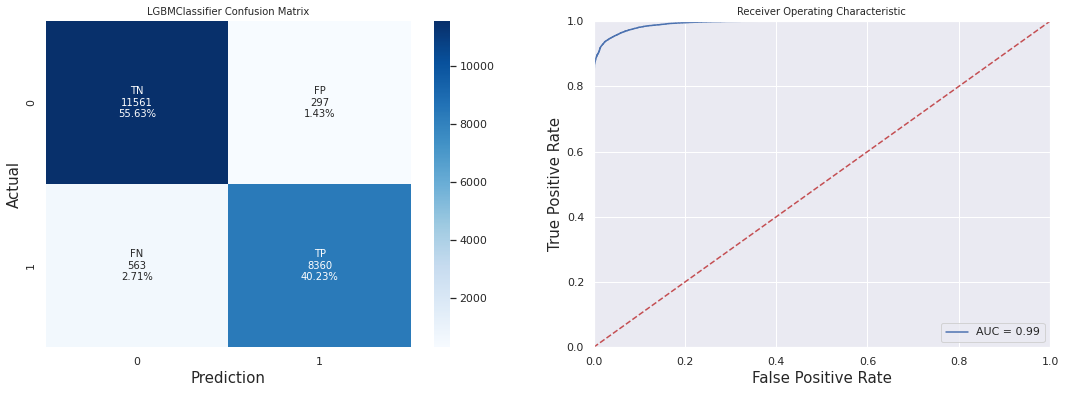

In [315]:
import lightgbm as lgb

#fit the model
lgb_model =lgb.LGBMClassifier(**best_rscv_params)
lgb_model.fit(X_train,y_train)

# prediction
pred_train = lgb_model.predict(X_train)
pred_val = lgb_model.predict(X_val)

# model name
model_name = str(type(lgb_model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(lgb_model,X_val,y_val)

**Observations**
- This model is performing better without hyperparameter tunning, 
- Before hypertparameter tunning the accuracy score for traing and vaidation dataset were 96.72 and 96.2 respectively. 
- The ROC AUC score is same befor and hyper Hyperparameter Tunning i.e 99.74%.

In [122]:
lgbm_feature_importance = model.feature_importances_
lgbm_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_feature_importance
}).sort_values('Importance', ascending=False)
lgbm_feature_importance_df

,Feature,Importance
1,Flight Distance,1534
0,Age,1241
16,Departure Delay in Minutes,851
17,Arrival Delay in Minutes,794
4,Ease of Online booking,783
2,Inflight wifi service,769
10,On-board service,685
12,Baggage handling,657
14,Inflight service,637
7,Online boarding,619


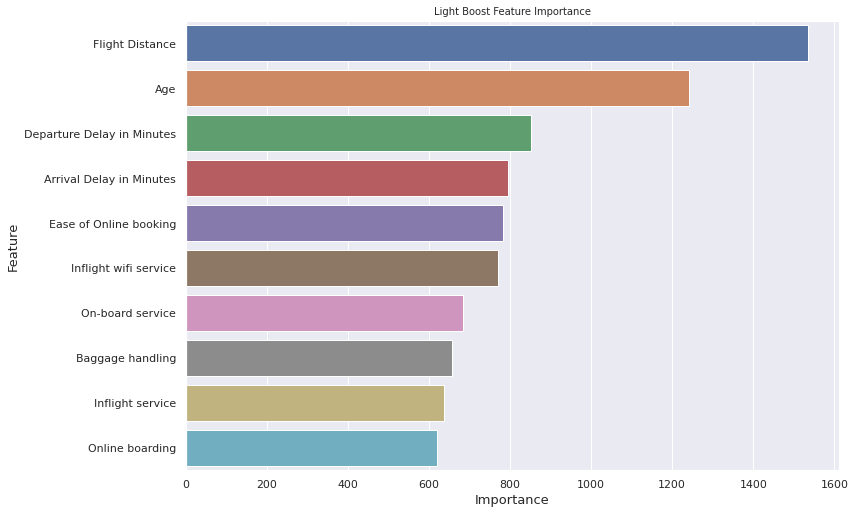

In [123]:
plt.title('Light Boost Feature Importance')
sns.barplot(data=lgbm_feature_importance_df.head(10), x='Importance', y='Feature');

### The Hyperparameter Tuning of XG-Boost
- We will Tune the Hyperparameters for the XG boost from here

In [124]:
%%time
xgb_model = XGBClassifier(random_state=42)

CPU times: user 74 µs, sys: 0 ns, total: 74 µs
Wall time: 81.8 µs


In [125]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [126]:
xgb_rscv_Parameters = {
    'max_depth' : [3,4,5,6],
    'learning_rate':[0.1,0.15,0.175],
    'colsample_bytree' : [0.4,0.6,0.8,1.0],
    'n_estimators' : [150,250,500,750],
    'gamma':[0.25,0.5],
    'subsample': [0.6,0.7,0.8,1],
    'scale_pos_weight': [12.5,13.5,14],  ### Ratio of negative to positive class   
}
xgb_model = XGBClassifier(random_state=42,n_jobs=-1)

In [127]:
initial_params = {
    "random_state":42,
    "n_jobs":-1
}

In [128]:
xgb_rscv_model = RandomizedSearchCV(estimator = xgb_model,
                                      param_distributions=xgb_rscv_Parameters,
                                      n_iter=50,
                                      cv=3,
                                      scoring= 'roc_auc',
                                      verbose=2)

In [129]:

%%time
xgb_rscv_model.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.4, gamma=0.25, learning_rate=0.175, max_depth=4, n_estimators=500, scale_pos_weight=14, subsample=0.8; total time=  19.9s
[CV] END colsample_bytree=0.4, gamma=0.25, learning_rate=0.175, max_depth=4, n_estimators=500, scale_pos_weight=14, subsample=0.8; total time=  19.9s
[CV] END colsample_bytree=0.4, gamma=0.25, learning_rate=0.175, max_depth=4, n_estimators=500, scale_pos_weight=14, subsample=0.8; total time=  20.5s
[CV] END colsample_bytree=0.8, gamma=0.25, learning_rate=0.175, max_depth=6, n_estimators=150, scale_pos_weight=14, subsample=0.7; total time=  15.6s
[CV] END colsample_bytree=0.8, gamma=0.25, learning_rate=0.175, max_depth=6, n_estimators=150, scale_pos_weight=14, subsample=0.7; total time=  15.5s
[CV] END colsample_bytree=0.8, gamma=0.25, learning_rate=0.175, max_depth=6, n_estimators=150, scale_pos_weight=14, subsample=0.7; total time=  16.9s
[CV] END colsample_bytree=0.8, gamma=0

RandomizedSearchCV(cv=3, estimator=XGBClassifier(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1.0],
                                        'gamma': [0.25, 0.5],
                                        'learning_rate': [0.1, 0.15, 0.175],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [150, 250, 500, 750],
                                        'scale_pos_weight': [12.5, 13.5, 14],
                                        'subsample': [0.6, 0.7, 0.8, 1]},
                   scoring='roc_auc', verbose=2)

In [130]:
best_rscv_params = lgbm_rscv_model.best_params_
best_rscv_params.update(initial_params)
best_rscv_params

{'n_estimators': 750,
 'min_split_gain': 0.225,
 'min_data_in_leaf': 550,
 'min_child_weight': 4,
 'max_depth': 6,
 'learning_rate': 0.055,
 'colsample_bytree': 0.3,
 'boosting_type': 'gbdt',
 'random_state': 42,
 'n_jobs': -1}

In [131]:
xgb_rscv_model.best_score_

0.994748181073352

		XGBCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.97      0.99      0.98     44202
              satisfaction       0.98      0.95      0.97     33726

                  accuracy                           0.97     77928
                 macro avg       0.97      0.97      0.97     77928
              weighted avg       0.97      0.97      0.97     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     14677
              satisfaction       0.97      0.94      0.95     11299

                  accuracy                           0.96     25976
                 macro avg       0.96      0.96      0.96     25976
              weighted avg       0.96      0.96      0.96     25976

Accuracy score for traing dataset 0.9733343599219793
Accuracy score for validation dataset 0.9603865106251925
ROC AUC Score

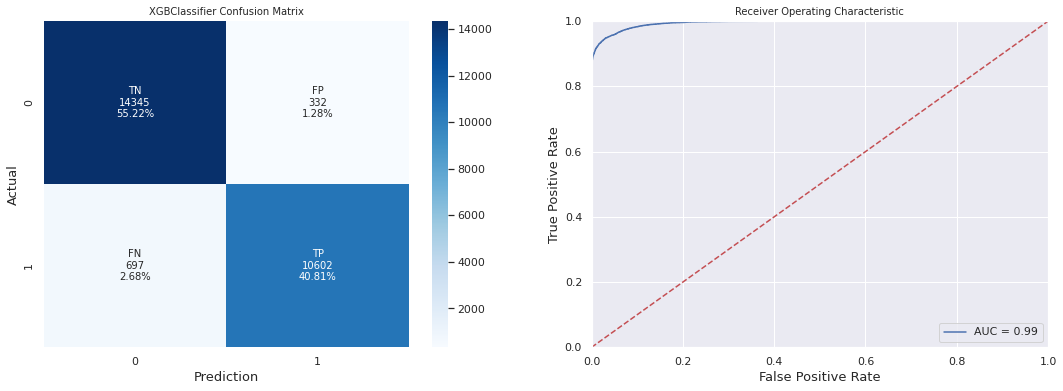

In [132]:
#import the model

from xgboost import XGBClassifier

#fit the model
xgb_model =XGBClassifier(**best_rscv_params)
xgb_model.fit(X_train,y_train)

# prediction
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_val)

# model name
model_name = str(type(xgb_model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(xgb_model,X_val,y_val)

**Observations**
- ***We will choose this model to train our dataset*** because this traing model is performing best among all the models.
- Before Hyperparameter tunning the Accuracy score for traing  and validation dataset were .941, 0.940
- After Hyperparameter tunning the Accuracy score for traing  and validation dataset is .973, 0.960 which is the highest accuracy for both training and validation dataset together.

In [349]:
xgb_feature_importance = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importance
}).sort_values('Importance', ascending=False)
xgb_feature_importance_df

,Feature,Importance
22,Type of Travel_Business travel,0.135494
2,Inflight wifi service,0.121159
25,Class_Eco,0.077860
23,Type of Travel_Personal Travel,0.077210
7,Online boarding,0.076128
24,Class_Business,0.073432
21,Customer Type_disloyal Customer,0.072459
20,Customer Type_Loyal Customer,0.063110
8,Seat comfort,0.053638
4,Ease of Online booking,0.038006


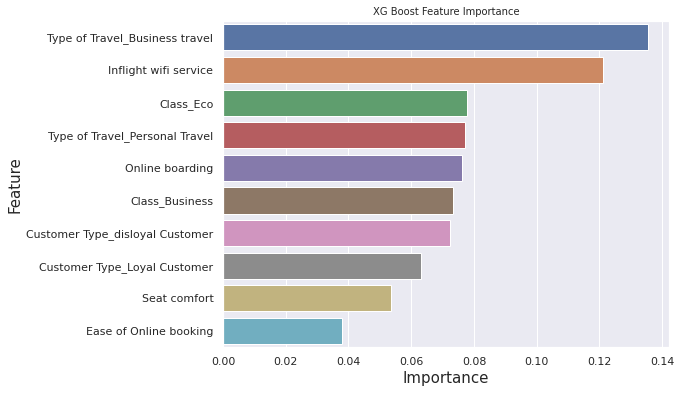

In [350]:
plt.title('XG Boost Feature Importance')
sns.barplot(data=xgb_feature_importance_df.head(10), x='Importance', y='Feature');

## Checking model accuracy on Test data

Lets check how are model is working with test data.
 

		XGBCLASSIFIER MODEL

Test data
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     11713
              satisfaction       0.97      0.94      0.95      9068

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 0.9745436463379423
Accuracy score for test dataset 0.9586160435012752
ROC AUC Score : 99.45%



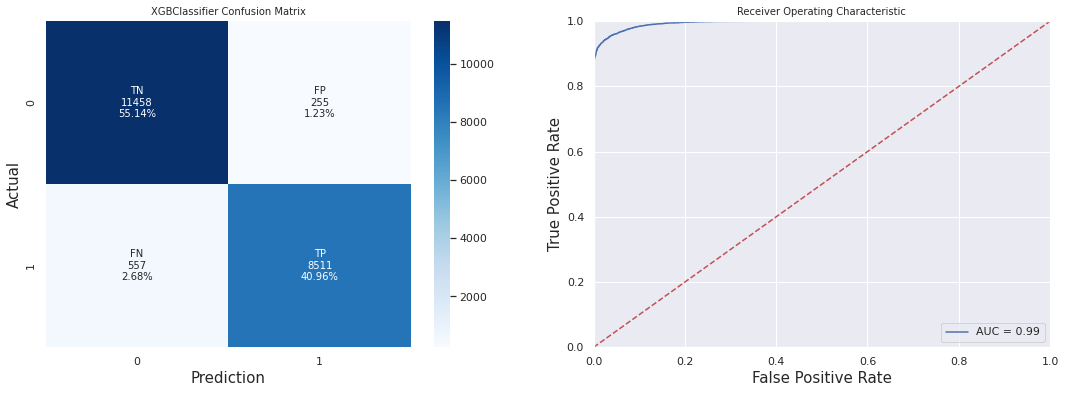

In [317]:
#import the model

from xgboost import XGBClassifier

#fit the model
xgb_model =XGBClassifier(**best_rscv_params)
xgb_model.fit(X_train,y_train)

# prediction
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

model_name = str(type(xgb_model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")


print('Test data')
print(classification_report(y_test, pred_test,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for test dataset",accuracy_score(y_val, pred_val))

make_classification_report(xgb_model,X_test,y_test)

**Observations**
- The accuracy for dataset for test is very good.
- The auc roc score is 99.45%
- The precision, and recall for the dataset are good too

		LGBMCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     35308
              satisfaction       0.98      0.94      0.96     27034

                  accuracy                           0.96     62342
                 macro avg       0.97      0.96      0.96     62342
              weighted avg       0.96      0.96      0.96     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.96     11713
              satisfaction       0.97      0.94      0.95      9068

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 0.9645503833691572
Accuracy score for validation dataset 0.9586160435012752
ROC AUC Scor

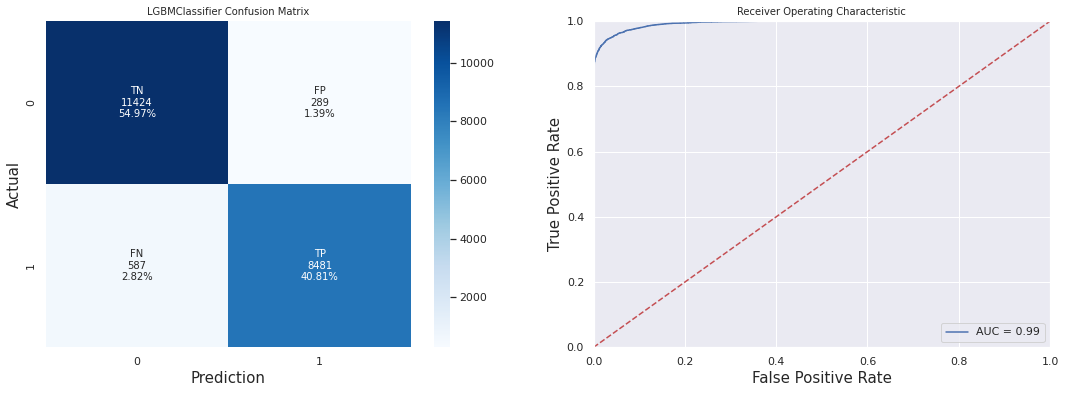

In [316]:
import lightgbm as lgb

#fit the model
lgb_model =lgb.LGBMClassifier(**best_rscv_params)
lgb_model.fit(X_train,y_train)

# prediction
pred_train = lgb_model.predict(X_train)
pred_test = lgb_model.predict(X_test)


# model name
model_name = str(type(lgb_model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_test, pred_test,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(lgb_model,X_test,y_test)

**Observations**
- The accuracy for dataset for test is very good with this model too.
- The auc roc score is 99.36%
- The precision, and recall for the dataset are good too.

## putting all the models prediction in sigle function.

Log_reg : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.84      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     11858
              satisfaction       0.86      0.84      0.85      8923

                  accuracy                           0.87     20781
                 macro avg       0.87      0.87      0.87     20781
              weighted avg       0.87      0.87      0.87     20781

ROC AUC Score : 92.68%



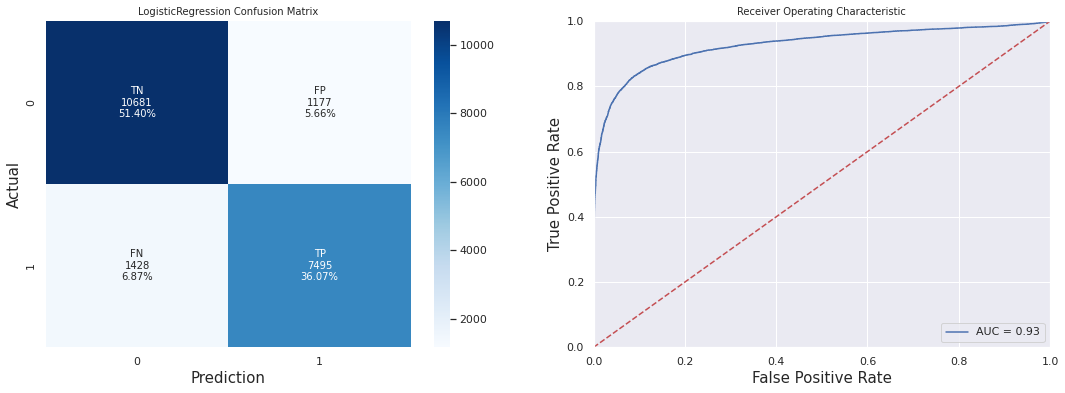

Gaus_NB : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.87     35308
              satisfaction       0.83      0.82      0.82     27034

                  accuracy                           0.85     62342
                 macro avg       0.84      0.84      0.84     62342
              weighted avg       0.85      0.85      0.85     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.87      0.87     11858
              satisfaction       0.82      0.82      0.82      8923

                  accuracy                           0.85     20781
                 macro avg       0.84      0.84      0.84     20781
              weighted avg       0.85      0.85      0.85     20781

ROC AUC Score : 91.53%



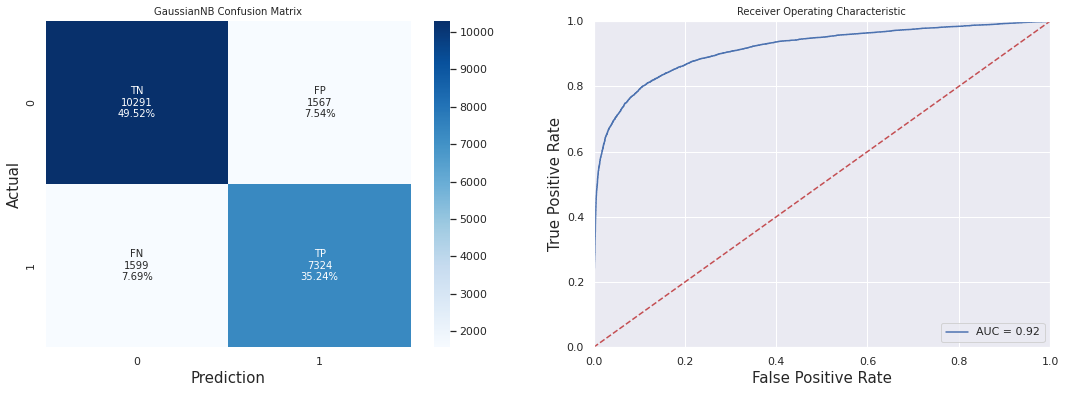

KNN : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.98      0.95     35308
              satisfaction       0.97      0.90      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.95      0.94      0.94     62342
              weighted avg       0.95      0.94      0.94     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.96      0.94     11858
              satisfaction       0.95      0.87      0.91      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.92      0.92     20781
              weighted avg       0.93      0.93      0.92     20781

ROC AUC Score : 96.60%



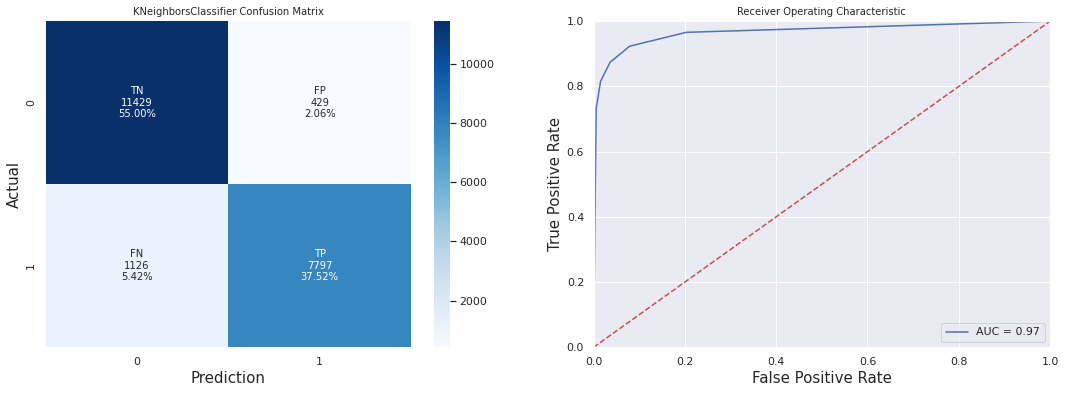

Stoch_GD : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.83      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     11858
              satisfaction       0.86      0.84      0.85      8923

                  accuracy                           0.87     20781
                 macro avg       0.87      0.87      0.87     20781
              weighted avg       0.87      0.87      0.87     20781

ROC AUC Score : 92.62%



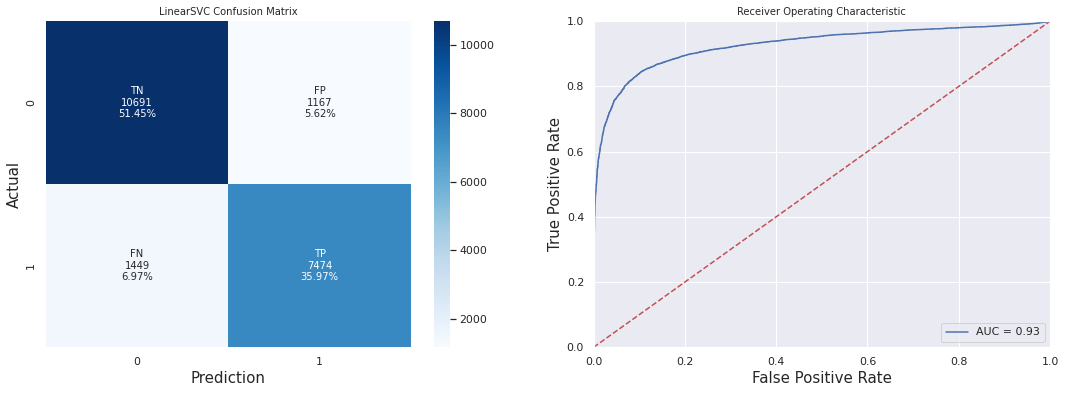

DT : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.77      0.83     35308
              satisfaction       0.75      0.90      0.82     27034

                  accuracy                           0.83     62342
                 macro avg       0.83      0.84      0.83     62342
              weighted avg       0.84      0.83      0.83     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.92      0.77      0.83     11858
              satisfaction       0.74      0.91      0.82      8923

                  accuracy                           0.83     20781
                 macro avg       0.83      0.84      0.83     20781
              weighted avg       0.84      0.83      0.83     20781

ROC AUC Score : 92.26%



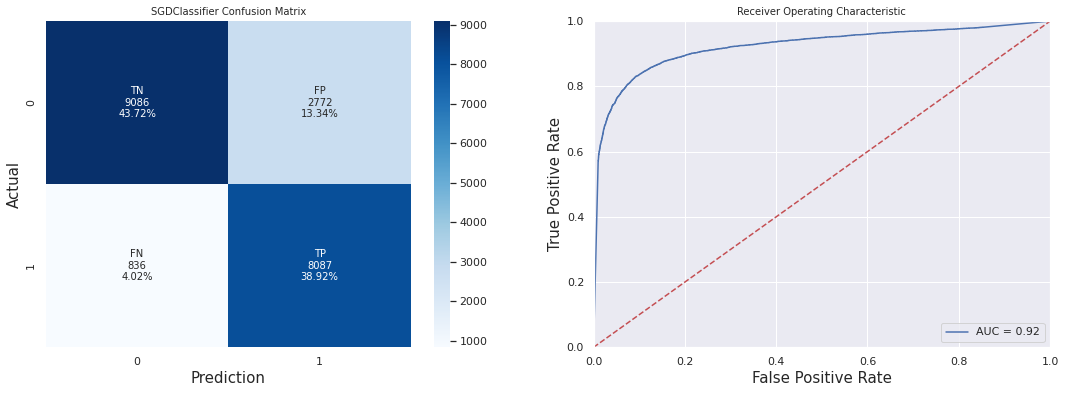

Ran_forest : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.95      0.95     11858
              satisfaction       0.93      0.94      0.94      8923

                  accuracy                           0.95     20781
                 macro avg       0.95      0.95      0.95     20781
              weighted avg       0.95      0.95      0.95     20781

ROC AUC Score : 94.65%



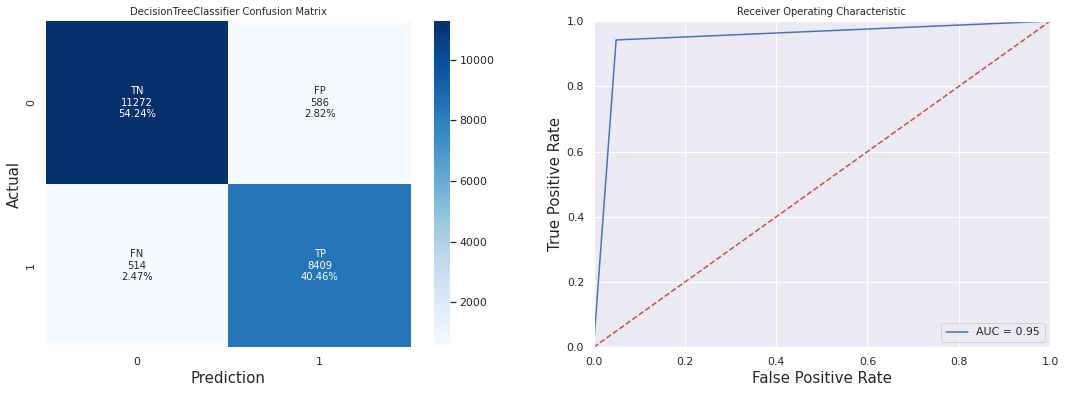

AdaBoost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

ROC AUC Score : 99.39%



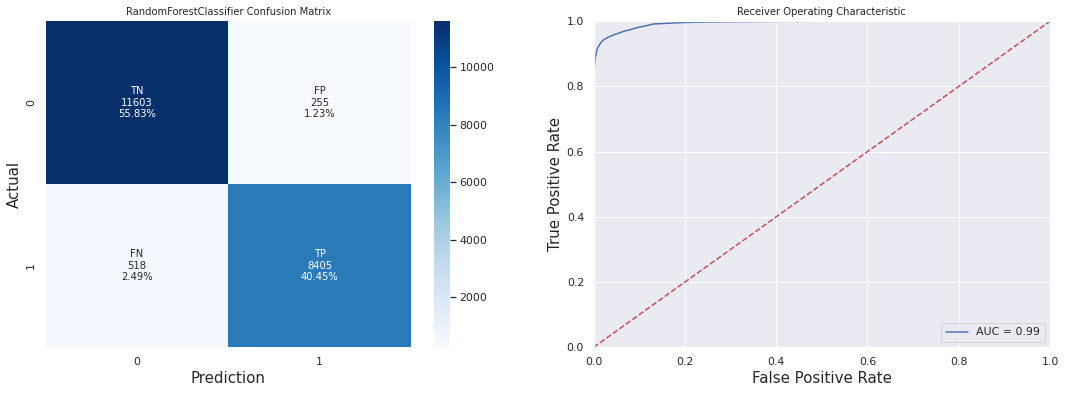

Grad_boost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     35308
              satisfaction       0.92      0.91      0.92     27034

                  accuracy                           0.93     62342
                 macro avg       0.93      0.93      0.93     62342
              weighted avg       0.93      0.93      0.93     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.94      0.94     11858
              satisfaction       0.92      0.91      0.92      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.93      0.93     20781
              weighted avg       0.93      0.93      0.93     20781

ROC AUC Score : 97.74%



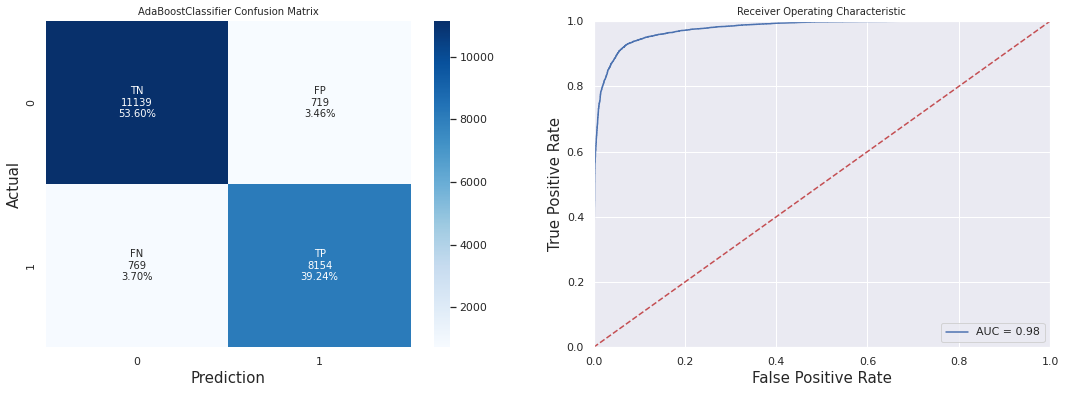

XGBoost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     35308
              satisfaction       0.95      0.92      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.94      0.94      0.94     62342
              weighted avg       0.94      0.94      0.94     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     11858
              satisfaction       0.94      0.92      0.93      8923

                  accuracy                           0.94     20781
                 macro avg       0.94      0.94      0.94     20781
              weighted avg       0.94      0.94      0.94     20781

ROC AUC Score : 98.71%



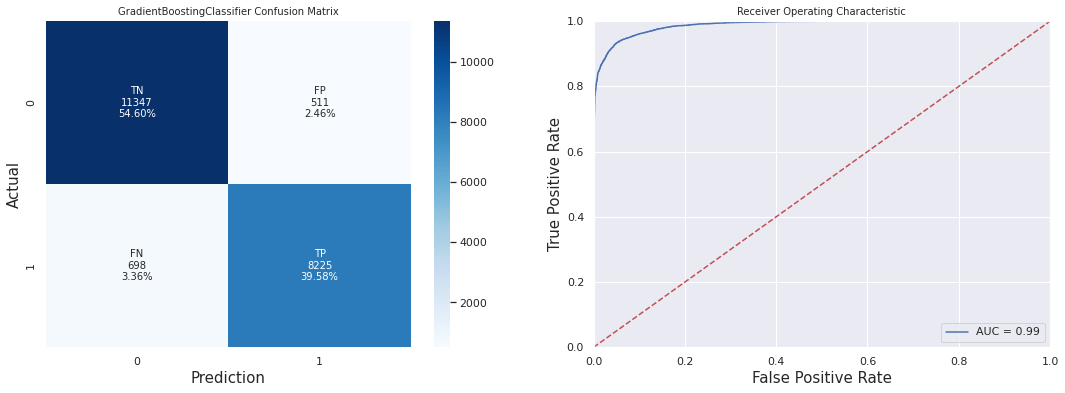

lightGbm : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     35308
              satisfaction       0.95      0.92      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.94      0.94      0.94     62342
              weighted avg       0.94      0.94      0.94     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     11858
              satisfaction       0.94      0.92      0.93      8923

                  accuracy                           0.94     20781
                 macro avg       0.94      0.94      0.94     20781
              weighted avg       0.94      0.94      0.94     20781

ROC AUC Score : 98.72%



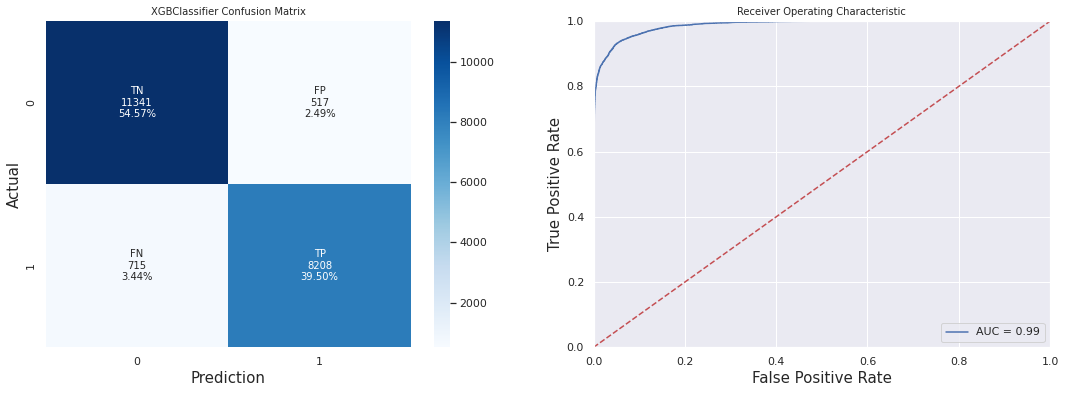

In [340]:
# putting all together at one place 
logisreg_clf =LogisticRegression()
GNB_clf = GaussianNB()
LSVC_clf = LinearSVC()
KN_clf = KNeighborsClassifier()
SGD_clf= SGDClassifier(loss='modified_huber',n_jobs=-1,random_state=42)
DT_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adb_clf= AdaBoostClassifier()
GB_clf = GradientBoostingClassifier()
XGB_clf = XGBClassifier()
lgb_clf= lgb.LGBMClassifier()

clf_list = [logisreg_clf,GNB_clf,KN_clf,LSVC_clf,SGD_clf,DT_clf ,rf_clf,adb_clf,GB_clf,XGB_clf,lgb_clf]
clf_name_list = ['Log_reg','Gaus_NB','KNN','Stoch_GD','DT','Ran_forest','AdaBoost','Grad_boost','XGBoost','lightGbm']

for clf in clf_list:
    clf.fit(X_train,y_train)

train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    
    pred_train = clf.predict(X_train)
    pred_val = clf.predict(X_val)
    
    print(name,': \n')

    print('Training part:')
    print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
    print('Validation part:')
    print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
      
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_val, pred_val))  

    make_classification_report(clf,X_val,y_val)  

Graphical presentation of above defined function for classifier to get the clear idea of comparison in classifiers in one look.

In [331]:
train_acc_list

[0.8744024894934395,
 0.8472458374771422,
 0.9447884251387507,
 0.8731032049019922,
 0.8271149465849668,
 1.0,
 1.0,
 0.9286997529755221,
 0.942735234673254,
 0.9418048827435758]

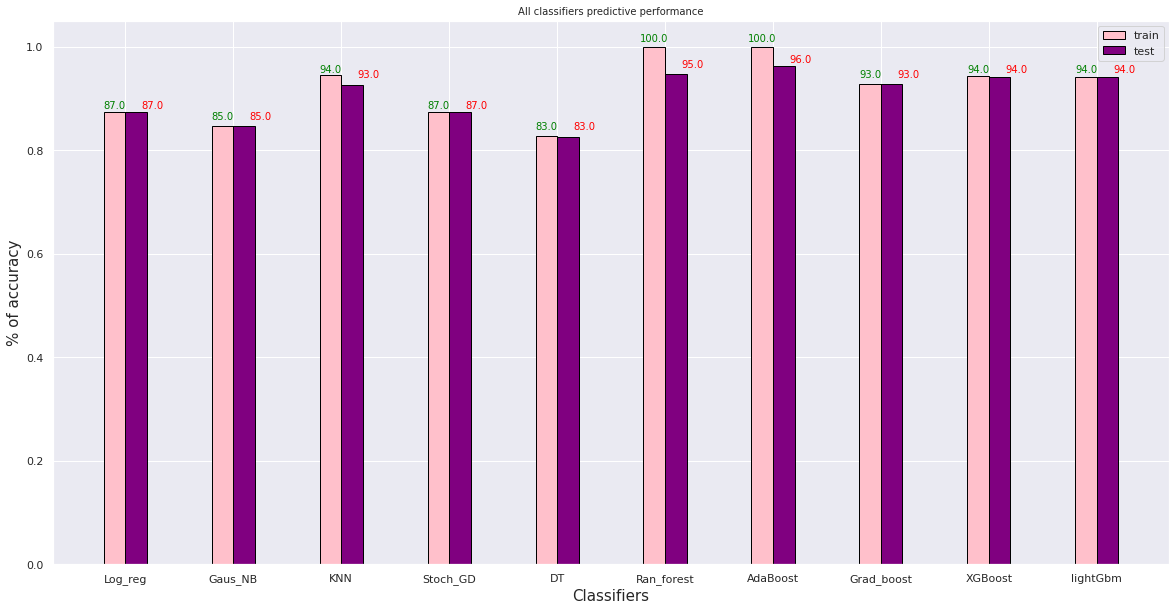

In [344]:
plt.figure(figsize=(20,10))

n = np.arange(10)
width = 0.2

plt.bar(n, train_acc_list, color = 'pink',
        width = width, edgecolor = 'black',
        label='train')
for i in range(len(train_acc_list)):
        plt.text(i,train_acc_list[i].round(2)+0.01,train_acc_list[i].round(2)*100,
                 ha = 'center',color = 'green')

plt.bar(n + width, test_acc_list, color = 'purple',
        width = width, edgecolor = 'black',
        label='test')

for i in range(len(test_acc_list)):
        plt.text(i+0.25,test_acc_list[i].round(2)+0.01,test_acc_list[i].round(2)*100,color = 'red')

plt.xlabel("Classifiers")
plt.ylabel("% of accuracy")
plt.title("All classifiers predictive performance")
  
plt.xticks(n + width/2,clf_name_list)
plt.legend()
  
plt.show()

**Observation**
- clearly from the above graph we can predict that Xgboost and Lightboost are performing best for our model, so we can use them to train our model that we already did above

# **Conclusion**
- The goal of the project is to build a model to find out The  Airline passenger satisfaction level:neutral or dissatisfaction', 'satisfaction'
- I have performed data analysis, data preprocessing, and data modelling with multiple machine learning models to achieve this. I have also extensively tuned the hyperparameters of XG Boost and Light Boost Models to achieve higher recall and F1-Score.
- The model is performing very good with the test data too.
- This project has been a great exercise for me to understand the concepts of machine learning. There are so many limitations with this model as the model is built only on the features that are provided in the dataset.
There is always an improvement when it comes to Machine Learning models. Thus, with limited resources and time I have developed a reasonable model. With more research and more time, the performance of the model can be improved.


# **References**
[1], Vasanth sai  https://jovian.ai/vasanthsai26/credit-default-prediction-with-machine-learning
<br>
[2], STEVE-LEE , 2020. Classification Metrics https://www.kaggle.com/code/leeyj0511/model-evaluation-1-classification-metrics  
[3], DURGANCE GAUR, 2022. A Guide to any Classification Problem https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem
<br>
[4], Dennis T, 2019. Confusion Matrix Visualization https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
<br>
[5], DEVELOPERS.GOOGLE,2022. ML INTRO https://developers.google.com/machine-learning/crash-course/ml-intro
<br>
[6],Analytics Vidhya,2022.Data Science Blogathon 24th Edition https://www.analyticsvidhya.com/blog/2022/09/data-science-blogathon-24th-edition/
<br>
[7],IBM.com, 2022. ML Models https://www.ibm.com/in-en
<br>
[8],Scikit Learn, 2022. Scikit Learn Documentation https://scikit-learn.org/stable/about.html#citing-scikit-learn
<br>
[9],Geeksforgeeks, 2022. Mchine Learning https://www.geeksforgeeks.org/machine-learning/?ref=ghm
<br>
[10],Rohith Gandhi,2018. Naive Bayes Classifier https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c
<br>
[11],Wikipedia,2022. Gaussian Function https://en.wikipedia.org/wiki/Gaussian_function
<br>
[12],ML CHEATSHEET, 2017. Classification Algorithms https://ml-cheatsheet.readthedocs.io/en/latest/classification_algos.html
<br>
[13],LaetitiaVanCauwenberge, 2016. k-nearest neighbor algorithm using Python https://www.datasciencecentral.com/k-nearest-neighbor-algorithm-using-python/
<br>
[14],saedsayad, 2015. K Nearest Neighbors - Classification https://www.saedsayad.com/k_nearest_neighbors.htm
<br>
[15],Ajitesh Kumar, 2022. K-Nearest Neighbors (KNN) Python Examples https://vitalflux.com/k-nearest-neighbors-explained-with-python-examples/
<br>
[16],xgboost developers,2021. XGBOOST Documentation https://xgboost.readthedocs.io/en/stable/
<br>
[17],Microsoft Corporation, 2022. LightGBM’s documentation https://lightgbm.readthedocs.io/en/latest/index.html 
<br>
[18],Wikipedia, 2022. Oversampling and Under sampling https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis
<br>
[19],ALEKSEY BILOGUR,2018. Undersampling and oversampling imbalanced data https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data/notebook
<br>
[20],Jovian.AI,2022. Data Science and Machine Learning Bootcamp https://jovian.ai/learn/zero-to-data-analyst-bootcamp
<br>

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>